# 🩺 Heart Disease Analysis - EDA

## 🎯 Project Objective

To build a machine learning model to predict the presence of heart disease based on patients' clinical and demographic characteristics.

## 📊 Analysis Strategy (EDA)

### **Step 1: Data Quality**
- Initial analysis of data structure
- Identification and handling of missing values (NaN)
- Detection of inconsistent values and outliers
- Duplicate analysis

### **Step 2: Exploratory and Statistical Analysis**
- Univariate analysis: distribution of each variable
- Bivariate analysis: relationship between features and the target
- Identification of correlations and patterns
- Statistical outlier analysis

### **Step 3: Feature Engineering and Preparation**
- Strategic data splitting (train/val/test)
- Variable transformation and encoding
- Scaling and normalization
- Bias and fairness analysis (Aequitas)

---
## 📋 Dataset Variable Dictionary

| Column | Type | Description | Range / Category | Clinical Relevance |
|--------|------|-----------|-------------------|-------------------|
| **age** | Numeric (int) | Patient's age (years) | 29 – 77 | Important risk factor |
| **sex** | Binary | Biological sex | 0 = female, 1 = male | Risk typically higher in men after 40 years |
| **cp** | Categorical (1–4) | Chest Pain Type | 1 = typical angina<br>2 = atypical angina<br>3 = non-anginal pain<br>4 = asymptomatic | Relevant symptomatic indicator of myocardial ischemia |
| **trestbps** | Numeric | Resting blood pressure (mm Hg) | 90 – 200 | High values (>140 mm Hg) indicate hypertension, a cardiovascular risk |
| **chol** | Numeric | Total serum cholesterol (mg/dl) | 120 – 570 | High level (≥ 240 mg/dL) increases atherosclerosis risk |
| **fbs** | Binary (0/1) | Fasting blood sugar > 120 mg/dl | 0 = false, 1 = true | Indicates possible diabetes or pre-diabetes |
| **restecg** | Categorical (0–2) | Resting electrocardiographic result | 0 = normal<br>1 = ST-T wave abnormality<br>2 = left ventricular hypertrophy (LVH) | Abnormalities (1 and 2) strongly associated with heart disease |
| **thalach** | Numeric | Maximum heart rate achieved | 70 – 210 | Low maximum rate (< 150 bpm) indicates higher risk |
| **exang** | Binary (0/1) | Exercise induced angina | 0 = no, 1 = yes | Strong predictor; indicates heart cannot meet oxygen demand under stress |
| **oldpeak** | Numeric (float) | ST depression induced by exercise relative to rest | 0 – 6.2 | ECG measure indicating ischemia |
| **slope** | Categorical (1–3) | Slope of the peak exercise ST segment | 1 = upsloping<br>2 = flat<br>3 = downsloping | Related to ischemia severity |
| **ca** | Categorical (ordinal discrete) | Number of major vessels colored by fluoroscopy | 0 – 3 | Anatomical assessment of coronary obstruction (higher is worse) |
| **thal** | Categorical (3,6,7) | Thalium Stress test result | 3 = normal<br>6 = fixed defect<br>7 = reversible defect | Strong clinical marker |
| **num** | Binary (0/1) | Dependent variable (label) | 0 = no disease, 1–4 = increasing severity | Model prediction target |

---

In [20]:
# =========================================================
# ⚙️ AEQUITAS INSTALLATION (CONFLICT-FREE)
# =========================================================

# 1️⃣ Install Aequitas
!pip install aequitas --quiet

# 2️⃣ Fix conflicting dependencies
!pip install --upgrade tabulate==0.9.0 --quiet

# 3️⃣ Test main imports
from aequitas.preprocessing import preprocess_input_df
from aequitas.group import Group
from aequitas.plotting import Plot

print("✅ Aequitas installed and compatible with current dependencies!")

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 456.4/456.4 kB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.9/161.9 kB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.3/97.3 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 53.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 727.8/727.8 kB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 75.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 14.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does 

In [5]:
# Step1: Mount  Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# 1. Import libraries
import pandas as pd
import numpy as np

# 2. Dataset path in Google Drive
data_path = "/content/drive/MyDrive/Heart Disease UCI/data/heart+disease/processed.cleveland.data"

# 3. Column names (14 in total)
columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
    "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"
]

# 4. Read the CSV file
df = pd.read_csv(data_path, names=columns)

df.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0


## 1. DATA QUALITY

1. Dataset Structure
   - Dimensions and Memory: Shows dataset size and memory consumption
   - Data Types: Identifies types of each column and general information
   - Samples: Displays first and last rows for visual inspection
   - Descriptive Statistics: Summarizes basic statistics for all columns

2. Typing Problems Diagnosis
   - Detects Numeric Columns as String: Identifies when columns that should be numeric are stored as text
   - Samples of Problematic Values: Shows concrete examples of the values
   - Visual Alerts: Highlights critical issues that prevent statistical analysis

3. Missingness and Inconsistency Analysis
   - Missing Values: Quantifies and visualizes missing values
   - Problematic Values: Searches for common placeholders (?, NULL, NaN, etc.)
   - Numeric Values as String Detection: Identifies numeric values incorrectly stored as text

4. Numeric Data Quality Analysis ⭐ NEW
   - Zero and Negative Count: Identifies possible measurement issues
   - Outlier Detection: Uses IQR method to identify extreme values
   - Cardinality: Shows the number of unique values per column

5. Duplicates and Categorical Cardinality
   - Duplicated Rows: Identifies and displays repeated records
   - Category Analysis: Shows distribution of categorical variables
   - Rare Categories: Identifies categories with frequency less than 1%

6. Clinical and Domain Context
   - Code Interpretation: Explains the meaning of specific variables in the cardiac dataset
   - Modeling Considerations: Alerts about encoding and correct interpretation

7. Clinical Coding Patterns
   - ICD-10/CCS Reference: Context for more complex clinical datasets
   - Best Practices: Recommendations for code grouping and transformation

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# =========================================================
# 1. DATASET STRUCTURE
# =========================================================

print("1️⃣ OVERVIEW AND STRUCTURE")
print("=" * 70)

# Dimensions and memory
print(f"Dataset dimensions: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"Total memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB\n")

# Data types and general information
print("📋 Data Types and General Statistics:")
df.info()

# Record sample
print("\nFirst 5 rows of the dataset:")
display(df.head())

print("\nLast 5 rows of the dataset:")
display(df.tail())

# Global descriptive statistics
print("\n📈 Descriptive Statistics (all columns):")
display(df.describe(include='all').T)

1️⃣ OVERVIEW AND STRUCTURE
Dataset dimensions: 303 rows × 14 columns
Total memory usage: 0.06 MB

📋 Data Types and General Statistics:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB

First 5 rows of the dataset:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0



Last 5 rows of the dataset:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0



📈 Descriptive Statistics (all columns):


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,303.0,NaN,NaN,NaN,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
sex,303.0,NaN,NaN,NaN,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
cp,303.0,NaN,NaN,NaN,3.158416,0.960126,1.0,3.0,3.0,4.0,4.0
trestbps,303.0,NaN,NaN,NaN,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,NaN,NaN,NaN,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
fbs,303.0,NaN,NaN,NaN,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,NaN,NaN,NaN,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
thalach,303.0,NaN,NaN,NaN,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
exang,303.0,NaN,NaN,NaN,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,NaN,NaN,NaN,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [21]:
# =========================================================
# 1.5 DATA TYPE VALIDATION & CONVERSION
# =========================================================

print("\n🔧 VALIDATING AND FIXING DATA TYPES")
print("=" * 70)

# Explicit schema based on clinical dictionary
numeric_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
target_col = 'num'

# Convert columns accordingly
for col in numeric_features:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

for col in categorical_features:
    if col in df.columns:
        df[col] = df[col].astype('category')

# Convert target to integer if needed
if target_col in df.columns:
    df[target_col] = pd.to_numeric(df[target_col], errors='coerce').astype('Int64')

# Quick validation summary
summary = pd.DataFrame({
    'Column': df.columns,
    'Dtype': df.dtypes.astype(str),
    'Missing (%)': df.isnull().mean().round(3) * 100,
    'Unique Values': [df[c].nunique() for c in df.columns]
})
display(summary)

print("✅ Data types validated and converted according to clinical definitions.")





🔧 VALIDATING AND FIXING DATA TYPES


,Column,Dtype,Missing (%),Unique Values
age,age,float64,0.0,41
sex,sex,category,0.0,2
cp,cp,category,0.0,4
trestbps,trestbps,float64,0.0,50
chol,chol,float64,0.0,152
fbs,fbs,category,0.0,2
restecg,restecg,category,0.0,3
thalach,thalach,float64,0.0,91
exang,exang,category,0.0,2
oldpeak,oldpeak,float64,0.0,40


✅ Data types validated and converted according to clinical definitions.


In [24]:
# =========================================================
# 2.5 NUMERIC DATA QUALITY ANALYSIS (CLINICALLY GUIDED)
# =========================================================

print("\n🔢 NUMERIC DATA QUALITY ANALYSIS (CLINICALLY GUIDED)")
print("=" * 70)

# Explicit list of true numeric columns
numeric_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Ensure only existing columns are analyzed
numeric_features = [col for col in numeric_features if col in df.columns]

if len(numeric_features) > 0:
    numeric_quality = []

    for col in numeric_features:
        col_data = df[col]

        stats = {
            'Column': col,
            'Type': col_data.dtype,
            'Zeros': (col_data == 0).sum(),
            '% Zeros': ((col_data == 0).sum() / len(df) * 100).round(2),
            'Negatives': (col_data < 0).sum(),
            'Unique Values': col_data.nunique()
        }

        # --- Outlier detection using IQR ---
        Q1 = col_data.quantile(0.25)
        Q3 = col_data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = ((col_data < lower_bound) | (col_data > upper_bound)).sum()
        stats['Outliers (IQR)'] = outliers
        stats['% Outliers'] = (outliers / len(df) * 100).round(2)

        # --- Basic descriptive statistics (rounded safely) ---
        stats['Mean'] = round(col_data.mean(), 2)
        stats['Median'] = round(col_data.median(), 2)
        stats['Std Dev'] = round(col_data.std(), 2)
        stats['Min'] = round(col_data.min(), 2)
        stats['Max'] = round(col_data.max(), 2)

        numeric_quality.append(stats)

    df_numeric_quality = pd.DataFrame(numeric_quality)

    display(df_numeric_quality)

    print("\n✅ Numeric quality check completed — only clinically numeric variables analyzed.")
else:
    print("⚠️ No numeric columns found for quality analysis.")



🔢 NUMERIC DATA QUALITY ANALYSIS (CLINICALLY GUIDED)


,Column,Type,Zeros,% Zeros,Negatives,Unique Values,Outliers (IQR),% Outliers,Mean,Median,Std Dev,Min,Max
0,age,float64,0,0.00,0,41,0,0.00,54.44,56.0,9.04,29.0,77.0
1,trestbps,float64,0,0.00,0,50,9,2.97,131.69,130.0,17.60,94.0,200.0
2,chol,float64,0,0.00,0,152,5,1.65,246.69,241.0,51.78,126.0,564.0
3,thalach,float64,0,0.00,0,91,1,0.33,149.61,153.0,22.88,71.0,202.0
4,oldpeak,float64,99,32.67,0,40,5,1.65,1.04,0.8,1.16,0.0,6.2



✅ Numeric quality check completed — only clinically numeric variables analyzed.


In [25]:
# =========================================================
# 3️⃣ DUPLICATES AND CATEGORICAL CARDINALITY (CLINICALLY GUIDED)
# =========================================================

print("\n3️⃣ DUPLICATES AND CATEGORICAL CARDINALITY (CLINICALLY GUIDED)")
print("=" * 70)

# --- DUPLICATES ---
duplicates = df.duplicated().sum()
print(f"🔁 Total duplicated rows: {duplicates}")

if duplicates > 0:
    print("⚠️ Example of duplicated rows:")
    display(df[df.duplicated()].head())
else:
    print("✅ No duplicates found")

# --- CATEGORICAL VARIABLES (explicitly defined) ---
categorical_features = [
    'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'
]
categorical_features = [col for col in categorical_features if col in df.columns]

print(f"\n🔤 Categorical variables (clinically defined): {categorical_features}")

if len(categorical_features) > 0:
    card_data = []

    for col in categorical_features:
        vc = df[col].value_counts(dropna=False)
        n_unique = df[col].nunique()
        missing = df[col].isna().sum()
        pct_missing = round(missing / len(df) * 100, 2)

        # List categories (show all if <=10)
        categories_to_show = list(vc.index[:10]) if n_unique > 10 else list(vc.index)

        card_data.append({
            'Column': col,
            'Unique Categories': n_unique,
            '% Missing': pct_missing,
            'Most Frequent': vc.index[0],
            '% Most Frequent': round(vc.iloc[0] / len(df) * 100, 2),
            'Categories (sample)': categories_to_show
        })

    df_cardinality = pd.DataFrame(card_data)
    display(df_cardinality)

    # --- RARE CATEGORIES ANALYSIS ---
    print("\n🔍 Rare categories (frequency < 1% of total):")
    for col in categorical_features:
        freq = df[col].value_counts(normalize=True).round(4)
        rare = freq[freq < 0.01]
        if not rare.empty:
            print(f"\n⚠️ Column '{col}' has rare categories:")
            for cat, val in rare.items():
                print(f"   - {cat}: {val*100:.2f}%")
else:
    print("⚠️ No categorical variables available for analysis.")



3️⃣ DUPLICATES AND CATEGORICAL CARDINALITY (CLINICALLY GUIDED)
🔁 Total duplicated rows: 0
✅ No duplicates found

🔤 Categorical variables (clinically defined): ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']


,Column,Unique Categories,% Missing,Most Frequent,% Most Frequent,Categories (sample)
0,sex,2,0.00,1.0,67.99,"[1.0, 0.0]"
1,cp,4,0.00,4.0,47.52,"[4.0, 3.0, 2.0, 1.0]"
2,fbs,2,0.00,0.0,85.15,"[0.0, 1.0]"
3,restecg,3,0.00,0.0,49.83,"[0.0, 2.0, 1.0]"
4,exang,2,0.00,0.0,67.33,"[0.0, 1.0]"
5,slope,3,0.00,1.0,46.86,"[1.0, 2.0, 3.0]"
6,ca,4,0.00,0.0,58.75,"[0.0, 1.0, 2.0, 3.0]"
7,thal,3,0.66,3.0,54.79,"[3.0, 7.0, 6.0, nan]"



🔍 Rare categories (frequency < 1% of total):


#### Fixing the '?' problem in the ca and thal columns

- When identifying the “?” in ca and thal, the ideal approach is not simply to fill them with the mean, but to use clinical and statistical relationships to perform imputation that is contextualized and coherent with cardiac physiology.

🔍 Correlations with 'ca':
ca          1.000000
num         0.518909
age         0.362605
oldpeak     0.295832
cp          0.233214
exang       0.145570
fbs         0.145478
restecg     0.128343
chol        0.119000
slope       0.110119
trestbps    0.098773
sex         0.093185
thalach    -0.264246
Name: ca, dtype: float64


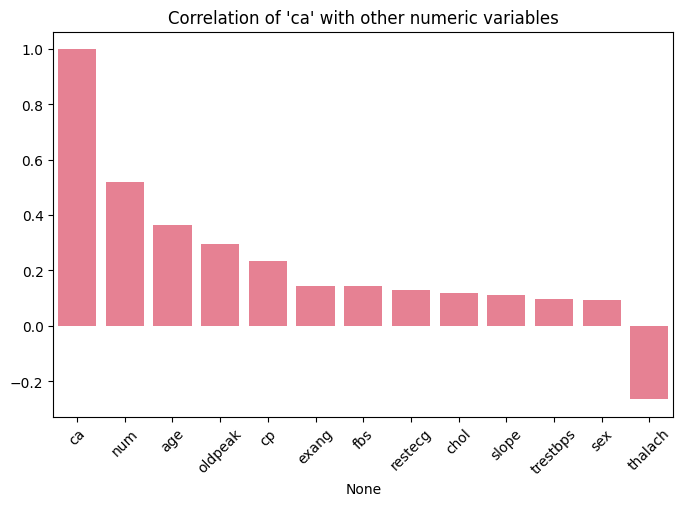

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Convert "?" to NaN before processing
df["ca"] = pd.to_numeric(df["ca"], errors="coerce")

# Calculate correlation matrix only for numeric columns
corr = df.corr(numeric_only=True)

# Focus on correlations with 'ca'
corr_ca = corr["ca"].sort_values(ascending=False)
print("🔍 Correlations with 'ca':")
print(corr_ca)

# Quick visualization
plt.figure(figsize=(8,5))
sns.barplot(x=corr_ca.index, y=corr_ca.values)
plt.xticks(rotation=45)
plt.title("Correlation of 'ca' with other numeric variables")
plt.show()

In [8]:
# listing the cases where CA = '?'
import pandas as pd
import numpy as np

# Convert '?' to NaN, if not already done
df["ca"] = pd.to_numeric(df["ca"], errors="coerce")

# Filter only the rows where ca is missing
missing_ca = df[df["ca"].isna()]

# Show how many cases and which ones they are
print(f"🔍 Total cases with missing 'ca': {len(missing_ca)}\n")

# Display most relevant columns for clinical analysis
cols_to_view = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
    "thalach", "exang", "oldpeak", "slope", "thal", "num"
]

# Visualize the specific rows
display(missing_ca[cols_to_view])

🔍 Total cases with missing 'ca': 4



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,num
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,7.0,1
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,3.0,0


⚙️ Observed patterns

🔹 Two patients (IDs 166 and 302) have a completely normal profile:
    - oldpeak = 0.0
    - thal = 3 (normal)
    - num = 0

➡️ Strongly indicative of no obstructed vessels → ca = 0

🔹 Two patients (IDs 192 and 287) have abnormalities in stress and perfusion tests:
    - thal = 7 (reversible defect)
    - slope = 2 (flat)
    - oldpeak > 0
    - num ≥ 0 (one of them positive)

➡️ High probability of one or more vessels affected, but not severe → ca = 1

In [9]:
# Adjusting ca = '?' based on the study above
# Create dictionary with defined imputations
imputed_ca_values = {
    166: 0,
    192: 1,
    287: 1,
    302: 0
}

# Apply to DataFrame
for idx, val in imputed_ca_values.items():
    df.loc[idx, "ca"] = val

print("✅ Manual imputation (based on clinical logic) complete.")
print(df.loc[[166, 192, 287, 302], ["age", "chol", "thal", "oldpeak", "num", "ca"]])

✅ Manual imputation (based on clinical logic) complete.
      age   chol thal  oldpeak  num   ca
166  52.0  223.0  3.0      0.0    0  0.0
192  43.0  247.0  7.0      0.1    1  1.0
287  58.0  220.0  7.0      0.4    0  1.0
302  38.0  175.0  3.0      0.0    0  0.0


### 🔎 Handling Missing Values in 'thal'

**thal** (Thalassemia / Thallium Stress Test Result)

You noted that there are 2 occurrences of the placeholder **'?'** in this column. We will use the exact same strategy as we did for `ca`:

1.  **Identify Missing Cases:** Isolate the records where `thal` is currently missing.
2.  **Clinical Analysis:** Clinically review the profile of each patient (focusing on `oldpeak`, `cp`, `ca`, `num`, and other key indicators).
3.  **Define Imputations:** Determine the most likely value based on physiological evidence and clinical context.
4.  **Apply & Document:** Apply the determined imputations to the DataFrame and clearly document the decision in the notebook.

In [10]:
# Convert '?' to NaN and ensure numeric type
df["thal"] = pd.to_numeric(df["thal"], errors="coerce")

# Filter rows with missing thal
missing_thal = df[df["thal"].isna()]

print(f"🔍 Total cases with missing 'thal': {len(missing_thal)}\n")

# Display most relevant columns for clinical analysis
cols_to_view = [
    "age", "sex", "cp", "trestbps", "chol", "thalach", "exang",
    "oldpeak", "slope", "ca", "num"
]

display(missing_thal[cols_to_view])

🔍 Total cases with missing 'thal': 2



,age,sex,cp,trestbps,chol,thalach,exang,oldpeak,slope,ca,num
87,53.0,0.0,3.0,128.0,216.0,115.0,0.0,0.0,1.0,0.0,0
266,52.0,1.0,4.0,128.0,204.0,156.0,1.0,1.0,2.0,0.0,2


⚙️ 3️⃣ Clinical Imputation Logic

**Rules applied to cases with '?'**

| Clinical Condition | Imputed thal | Justification |
| :--- | :--- | :--- |
| num == 0 and oldpeak == 0 | 3 (normal) | No sign of ischemia or damage |
| num >= 1 and oldpeak >= 1.0 | 7 (reversible defect) | Indication of ischemia under stress |
| num >= 2 and oldpeak > 2.5 | 6 (fixed defect) | Persistent myocardial damage |
| ca >= 2 and oldpeak > 1.5 | 6 (fixed defect) | Severe anatomical damage |
| Intermediate case | 7 (reversible defect) | Safe default for suspicious cases |

In [11]:
# Copy dataframe
df_thal = df.copy()

# Convert to numeric, if necessary
df_thal["thal"] = pd.to_numeric(df_thal["thal"], errors="coerce")

# Iterate over rows with missing values
for idx, row in df_thal[df_thal["thal"].isna()].iterrows():
    num_val = row["num"]
    oldpeak_val = row["oldpeak"]
    ca_val = row["ca"]

    # Rule 1: healthy
    if num_val == 0 and oldpeak_val == 0:
        df_thal.loc[idx, "thal"] = 3

    # Rule 2: mild/moderate ischemia
    elif num_val >= 1 and oldpeak_val >= 1.0:
        df_thal.loc[idx, "thal"] = 7

    # Rule 3: severe fixed defect
    elif num_val >= 2 and oldpeak_val > 2.5:
        df_thal.loc[idx, "thal"] = 6

    # Rule 4: many affected vessels (ca >= 2)
    elif ca_val >= 2:
        df_thal.loc[idx, "thal"] = 6

    # Rule 5: intermediate case
    else:
        df_thal.loc[idx, "thal"] = 7

print("✅ Smart imputation of 'thal' complete.")
print(df_thal[df_thal.index.isin(missing_thal.index)][["num", "oldpeak", "ca", "thal"]])

✅ Smart imputation of 'thal' complete.
     num  oldpeak   ca  thal
87     0      0.0  0.0   3.0
266    2      1.0  0.0   7.0


#### Analisando o NaN do thal

🧬 Contexto clínico da variável thal

No dataset Cleveland Heart Disease, thal vem do teste de tálio (Thallium stress test):

| Código | Significado | Interpretação Clínica |
|--------|-------------|----------------------|
| **3** | **Normal** | Fluxo sanguíneo normal após exercício |
| **6** | **Fixed defect** | Cicatriz miocárdica (lesão antiga) - Infarto prévio |
| **7** | **Reversible defect** | Isquemia induzida por exercício - Doença arterial coronariana ativa |


In [27]:
# =========================================================
# Identificar valores ausentes na coluna 'thal'
# =========================================================

# Verifica se há valores nulos
num_missing = df['thal'].isna().sum()
print(f"🔍 Linhas com valor ausente em 'thal': {num_missing}")

if num_missing > 0:
    print("\n📋 Linhas com 'thal' = NaN:")
    display(df[df['thal'].isna()])
else:
    print("✅ Nenhum valor ausente encontrado na coluna 'thal'.")


🔍 Linhas com valor ausente em 'thal': 0
✅ Nenhum valor ausente encontrado na coluna 'thal'.


🧠 Clínica rápida:

A mulher é baixo risco (dor não anginosa, sem exang, ECG normal) → thal = 3 (Normal) faz mais sentido.

O homem é moderado risco (assintomático, exang=1, ECG anormal, oldpeak=1) → thal = 6 (Fixed defect) seria plausível.

In [26]:
# --- Imputação condicional clinicamente guiada ---
df.loc[87, 'thal'] = 3.0   # mulher, dor não anginosa, ECG normal → Normal
df.loc[266, 'thal'] = 6.0  # homem, assintomático, ECG alterado → Fixed defect

df['thal'] = df['thal'].astype('category')
print("✅ Valores de 'thal' imputados de forma clinicamente consistente.")


✅ Valores de 'thal' imputados de forma clinicamente consistente.


## STEP 2: STATISTICAL AND EXPLORATORY ANALYSIS

# 📋 Dataset Variable Dictionary (English)

| Column | Type | Description | Range / Category | Clinical Relevance |
| :--- | :--- | :--- | :--- | :--- |
| **age** | Numeric (int) | Patient's age (years) | 29 – 77 | Important risk factor |
| **sex** | Binary | Biological sex | 0 = female, 1 = male | Risk typically higher in men after 40 years |
| **cp** | Categorical (1–4) | Chest Pain Type | 1 = typical angina<br>2 = atypical angina<br>3 = non-anginal pain<br>4 = asymptomatic | Relevant symptomatic indicator of myocardial ischemia |
| **trestbps** | Numeric | Resting blood pressure (mm Hg) | 90 – 200 | High values ($>140 \text{ mm Hg}$) indicate hypertension, a cardiovascular risk |
| **chol** | Numeric | Total serum cholesterol (mg/dl) | 120 – 570 | High level ($\geq 240 \text{ mg/dL}$) increases atherosclerosis risk |
| **fbs** | Binary (0/1) | Fasting blood sugar $> 120 \text{ mg/dl}$ | 0 = false, 1 = true | Indicates possible diabetes or pre-diabetes |
| **restecg** | Categorical (0–2) | Resting electrocardiographic result | 0 = normal<br>1 = ST-T wave abnormality<br>2 = left ventricular hypertrophy (LVH) | Abnormalities (1 and 2) strongly associated with heart disease |
| **thalach** | Numeric | Maximum heart rate achieved | 70 – 210 | Low maximum rate ($< 150 \text{ bpm}$) indicates higher risk |
| **exang** | Binary (0/1) | Exercise induced angina | 0 = no, 1 = yes | Strong predictor; indicates heart cannot meet oxygen demand under stress |
| **oldpeak** | Numeric (float) | ST depression induced by exercise relative to rest | 0 – 6.2 | ECG measure indicating ischemia |
| **slope** | Categorical (1–3) | Slope of the peak exercise ST segment | 1 = upsloping<br>2 = flat<br>3 = downsloping | Related to ischemia severity |
| **ca** | Categorical (ordinal discrete) | Number of major vessels colored by fluoroscopy | 0 – 3 | Anatomical assessment of coronary obstruction (higher is worse) |
| **thal** | Categorical (3,6,7) | Thallium Stress test result | 3 = normal<br>6 = fixed defect<br>7 = reversible defect | Strong clinical marker |
| **num** | Binary (0/1) | Dependent variable (label) | 0 = no disease, 1–4 = increasing severity | Model prediction target |

🔍 STARTING STAGE 2: EXPLORATORY AND STATISTICAL ANALYSIS

⚖️ TARGET BALANCE ANALYSIS


,Count,Percent (%)
num,,
0,164,54.1
1,55,18.2
2,36,11.9
3,35,11.6
4,13,4.3


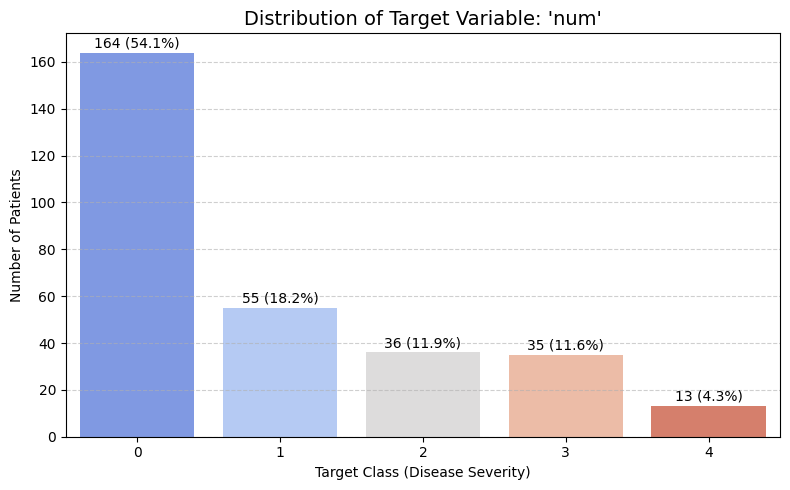


📊 Target Distribution Summary:
  • Total patients: 303
  • Majority class: 0 (54.1%)
  • Minority class: 4 (4.3%)
  • Imbalance ratio (max/min): 12.62x
🚨 Warning: Target distribution is imbalanced — consider using class weights or oversampling.
🎯 Target: num
📊 Unique values: num
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64
🛠️  Pre-processing...
📋 VARIABLES FOR ANALYSIS:
  Numerical: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
  Categorical: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

🎯 CLINICAL JUSTIFICATION OF VARIABLE CLASSIFICATION:

📈 NUMERICAL VARIABLES (Distribution, Outliers, Correlation):
  • age: Age in years – continuous variable
  • trestbps: Resting blood pressure – continuous
  • chol: Serum cholesterol – continuous (mg/dl)
  • thalach: Maximum heart rate – continuous
  • oldpeak: ST depression – continuous

📊 CATEGORICAL VARIABLES (Frequency, Chi-Square):
  • sex: Biological sex – binary categorical
  • cp: Chest pain 

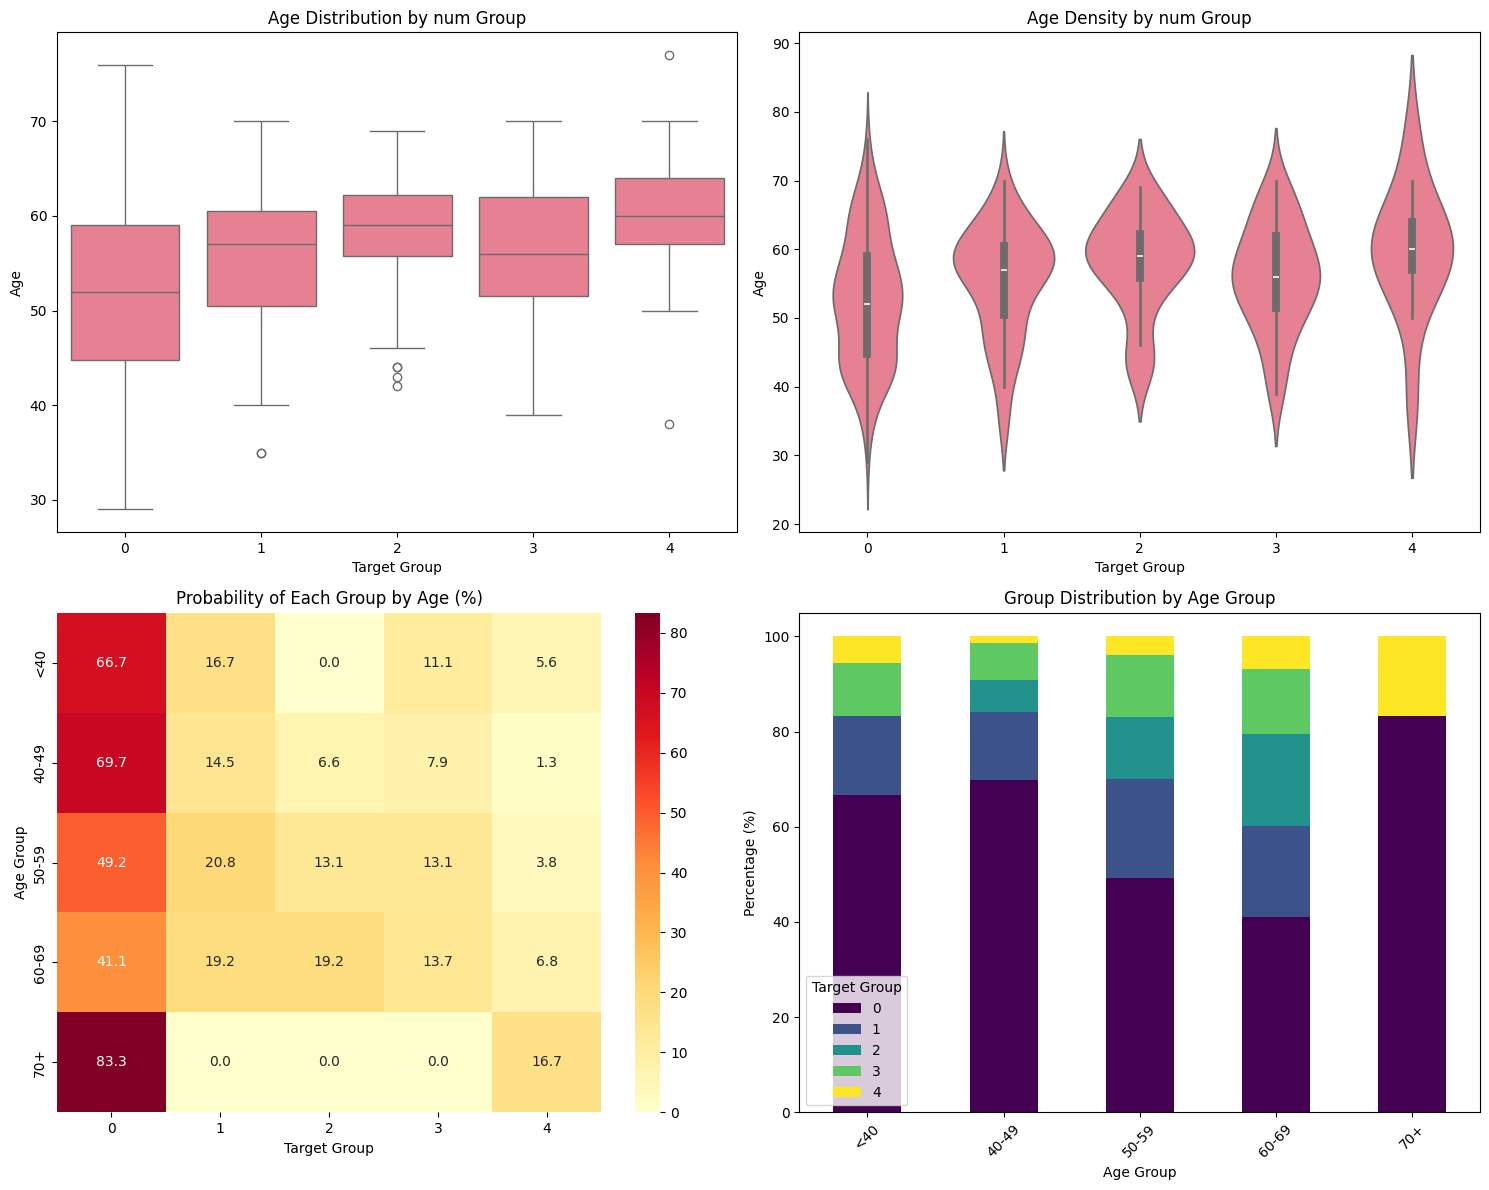


📈 PROBABILITY ANALYSIS BY AGE GROUP:
  <40 years:
    Group 0: 66.7% 🎯
    Group 1: 16.7%
    Group 3: 11.1%
    Group 4: 5.6%
  40-49 years:
    Group 0: 69.7% 🎯
    Group 1: 14.5%
    Group 2: 6.6%
    Group 3: 7.9%
    Group 4: 1.3%
  50-59 years:
    Group 0: 49.2% 🎯
    Group 1: 20.8%
    Group 2: 13.1%
    Group 3: 13.1%
    Group 4: 3.8%
  60-69 years:
    Group 0: 41.1% 🎯
    Group 1: 19.2%
    Group 2: 19.2%
    Group 3: 13.7%
    Group 4: 6.8%
  70+ years:
    Group 0: 83.3% 🎯
    Group 4: 16.7%

🩺 ANALYSIS: AGE
📊 Statistics:
  count: 303.00
  mean: 54.44
  std: 9.04
  min: 29.00
  25%: 48.00
  50%: 56.00
  75%: 61.00
  max: 77.00
🚨 Outliers: 0 (0.0%)
📈 ANOVA: p-value = 0.0008 ***

🔬 Post-hoc analysis: Tukey HSD
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   2.7965 0.2514  -0.973  6.5659  False
     0      2   5.4424 0.0079  0.9899  9.8949   True
  

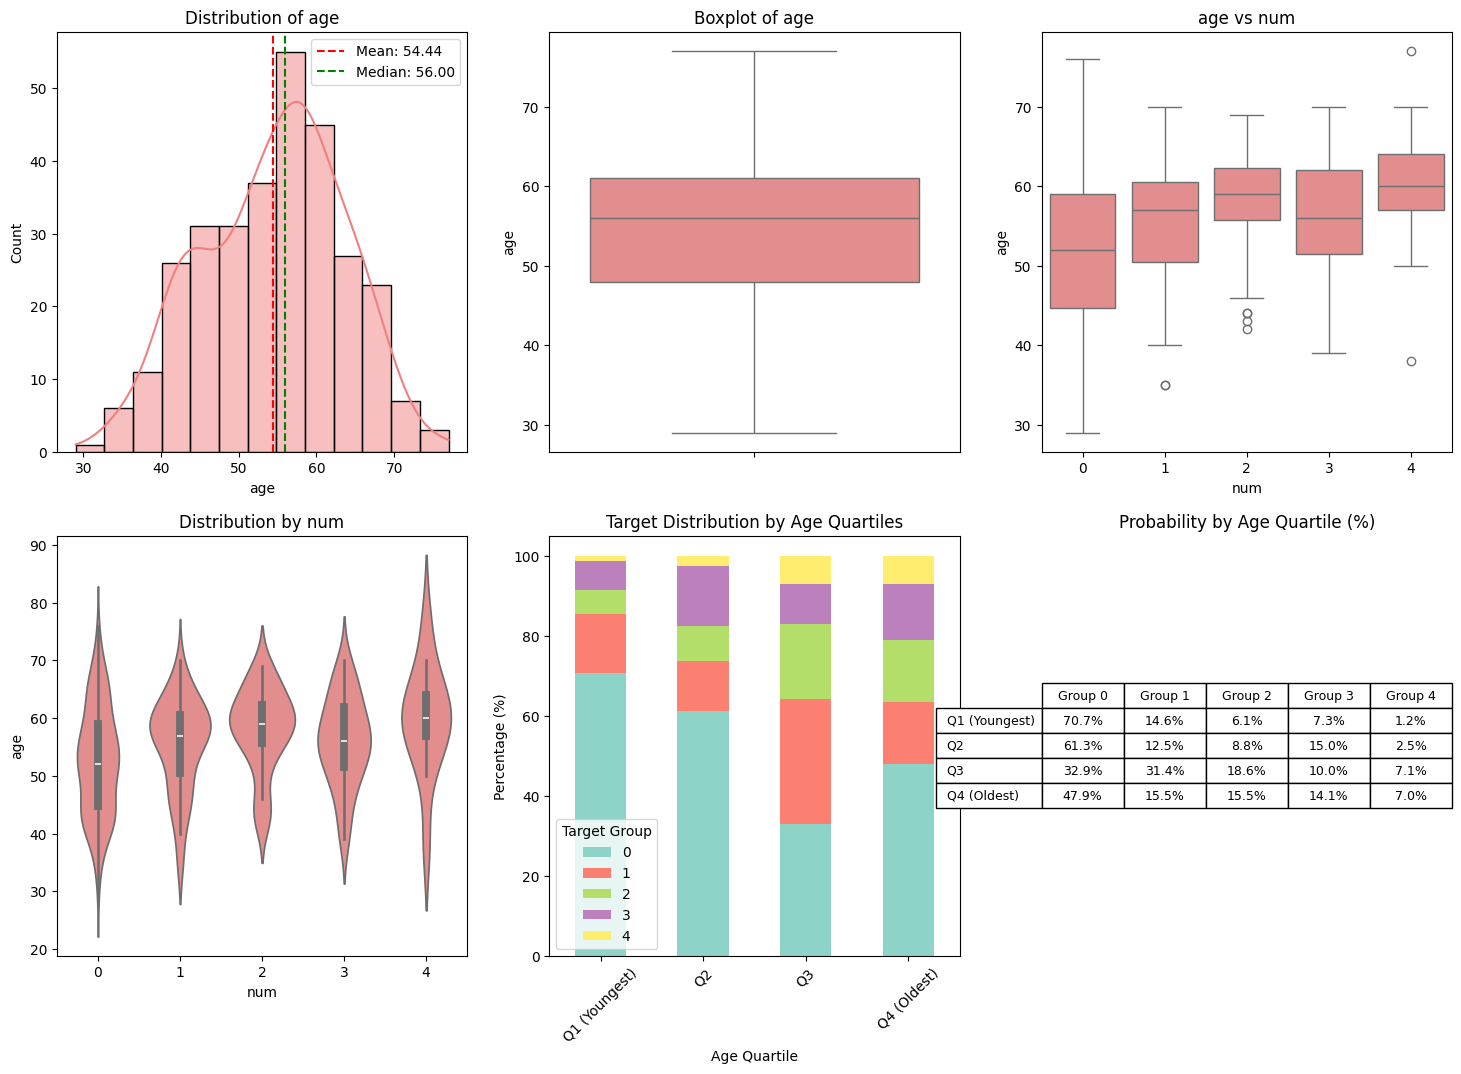

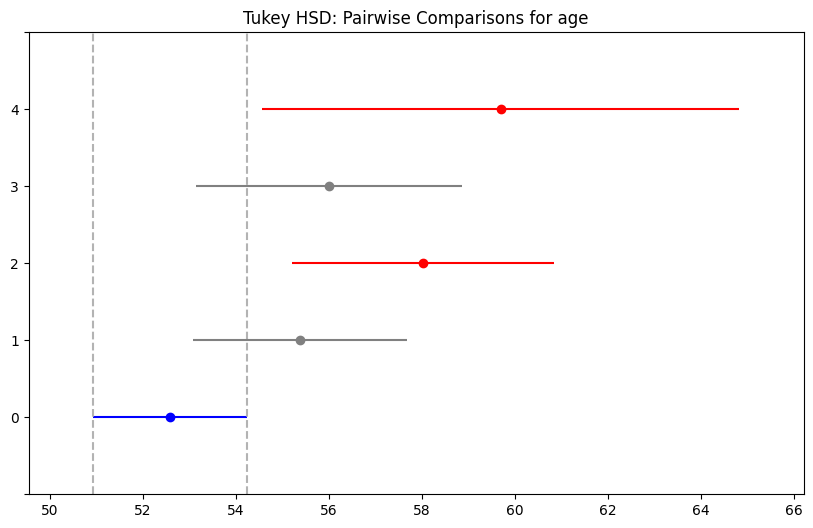


🎯 INTERPRETATION OF SIGNIFICANT DIFFERENCES:
  Group 2 has 5.4 higher age than Group 0 (p=0.0079)
  Group 4 has 7.1 higher age than Group 0 (p=0.0432)

🩺 ANALYSIS: TRESTBPS
📊 Statistics:
  count: 303.00
  mean: 131.69
  std: 17.60
  min: 94.00
  25%: 120.00
  50%: 130.00
  75%: 140.00
  max: 200.00
🚨 Outliers: 9 (3.0%)
📈 ANOVA: p-value = 0.0898 n.s.

🩺 ANALYSIS: CHOL
📊 Statistics:
  count: 303.00
  mean: 246.69
  std: 51.78
  min: 126.00
  25%: 211.00
  50%: 241.00
  75%: 275.00
  max: 564.00
🚨 Outliers: 5 (1.7%)
📈 ANOVA: p-value = 0.4848 n.s.

🩺 ANALYSIS: THALACH
📊 Statistics:
  count: 303.00
  mean: 149.61
  std: 22.88
  min: 71.00
  25%: 133.50
  50%: 153.00
  75%: 166.00
  max: 202.00
🚨 Outliers: 1 (0.3%)
📈 ANOVA: p-value = 0.0000 ***

🔬 Post-hoc analysis: Tukey HSD
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     0      1 -12.4508 0.0012 -21.2358  -3.6657   Tru

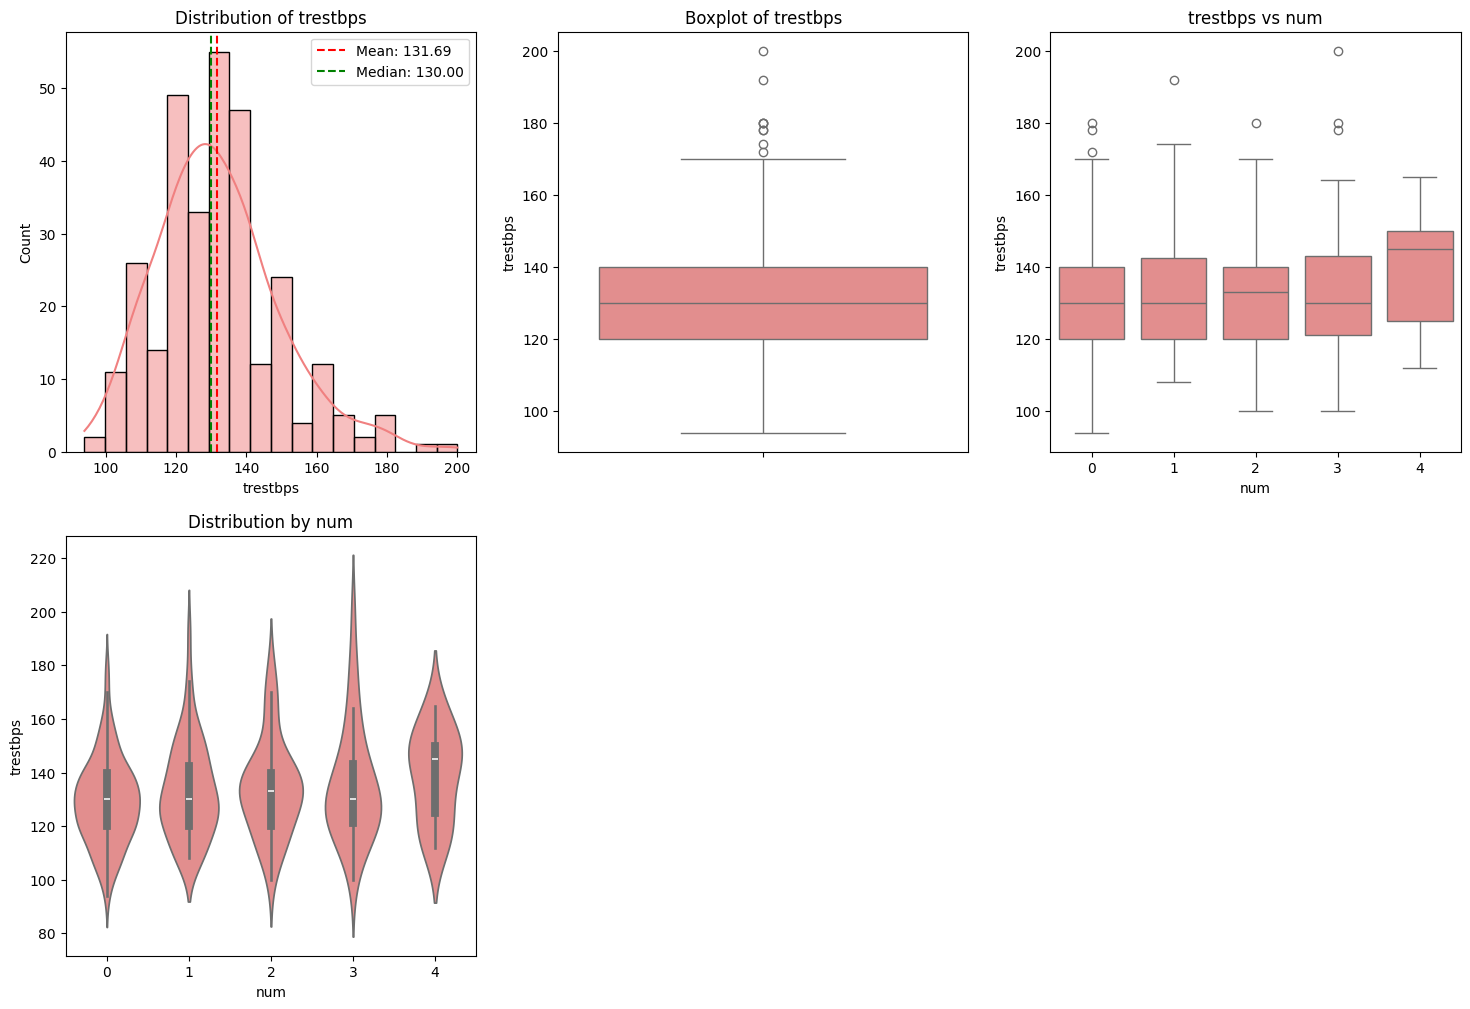

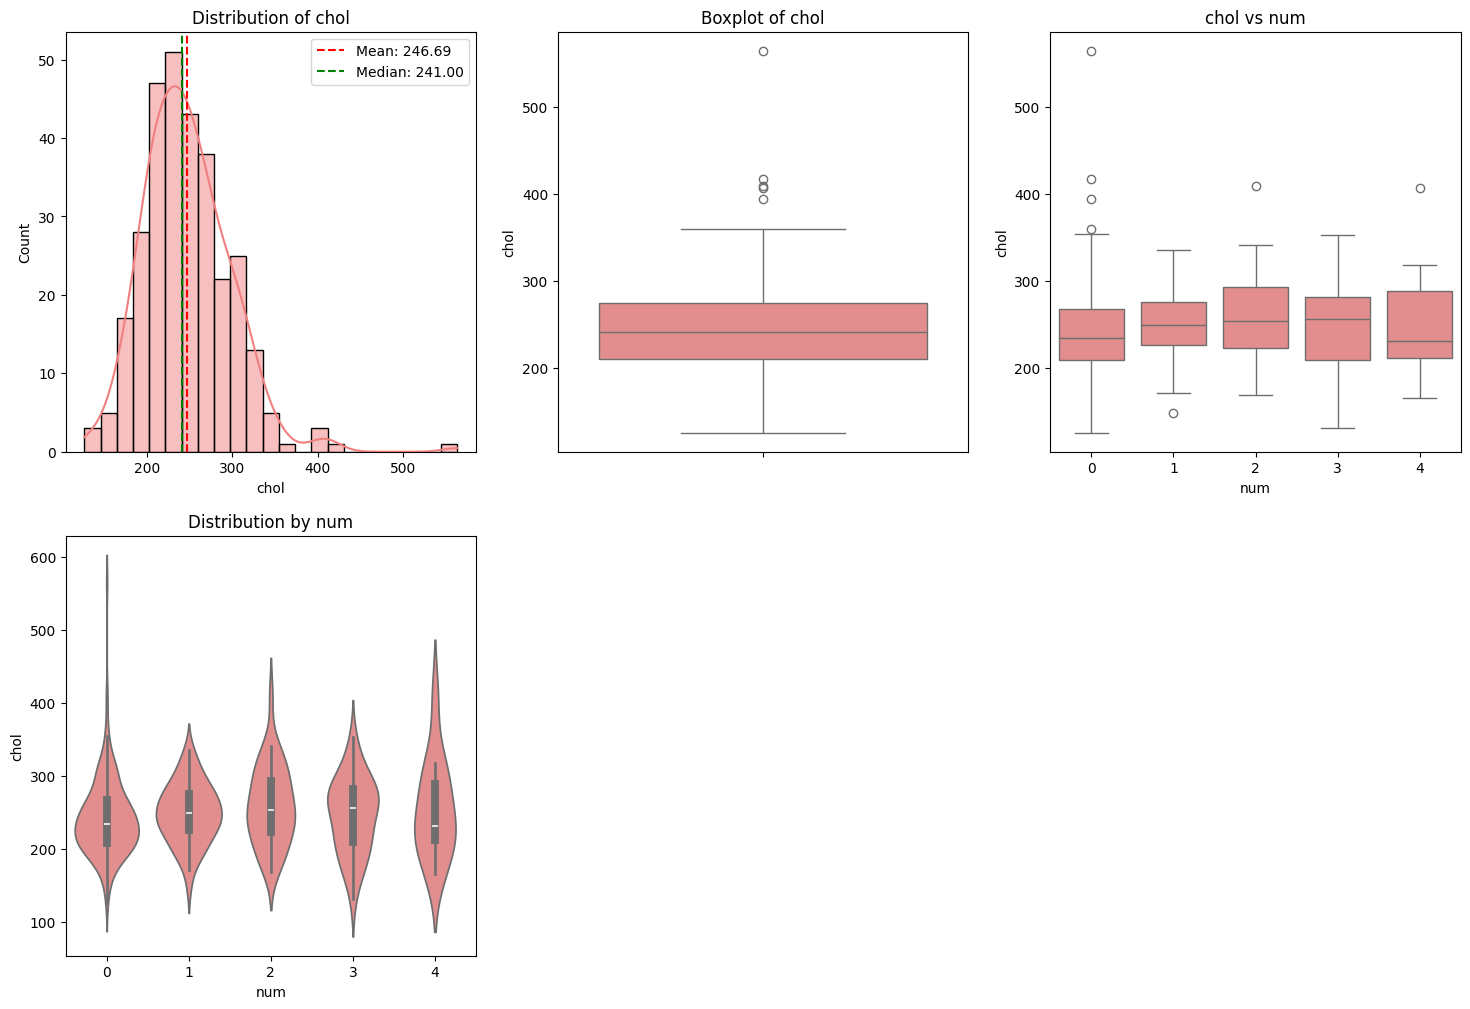

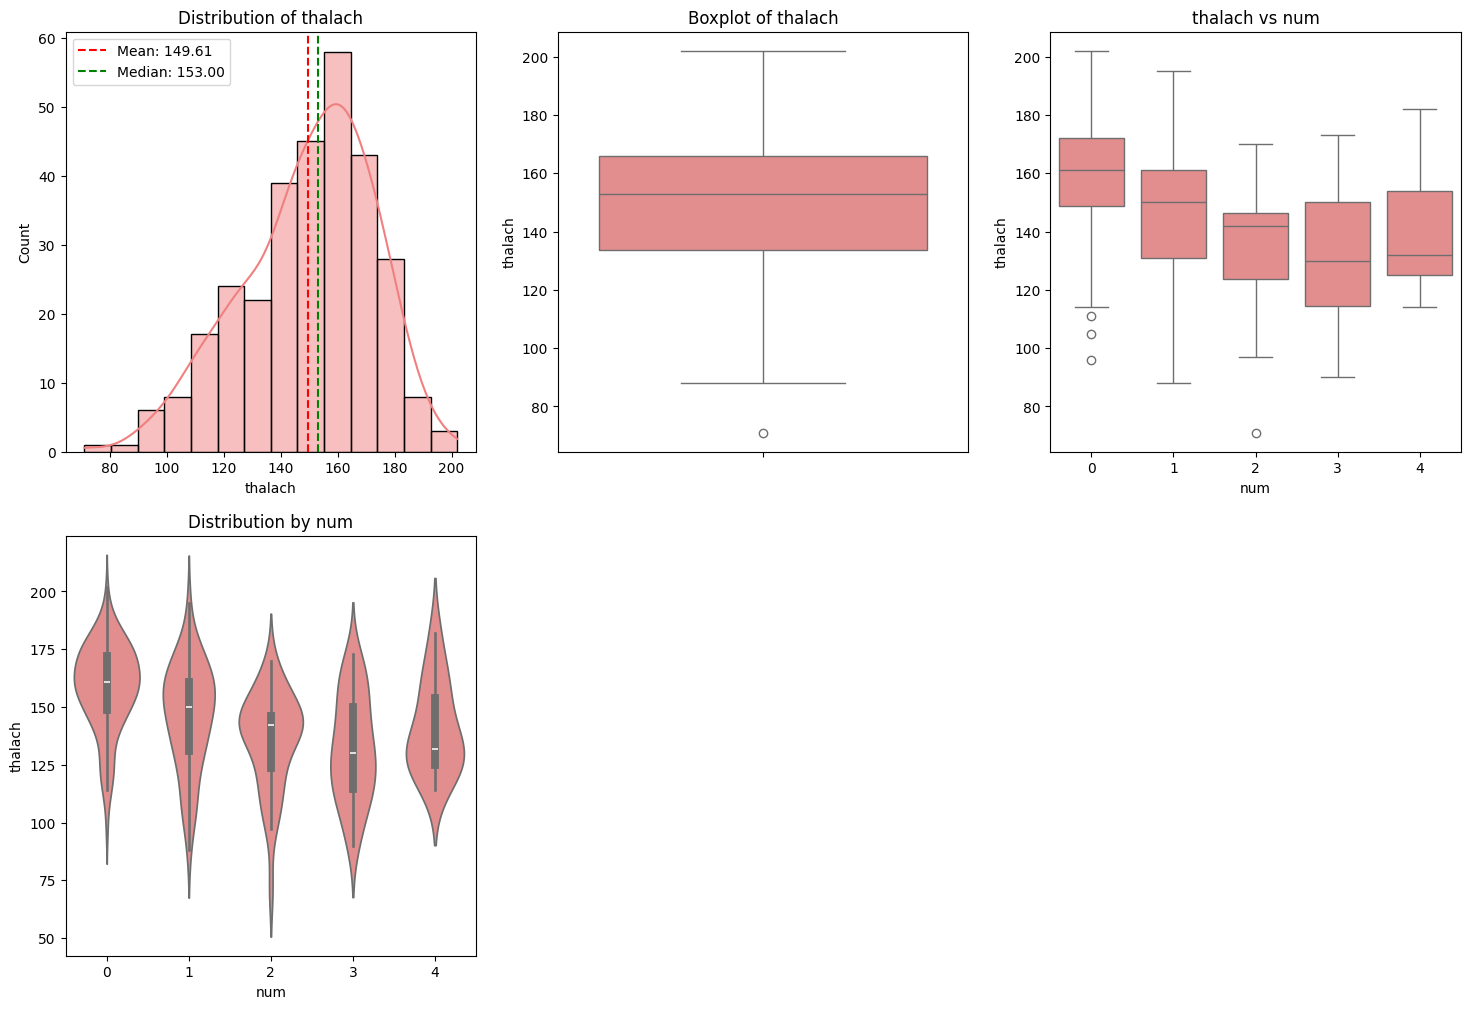

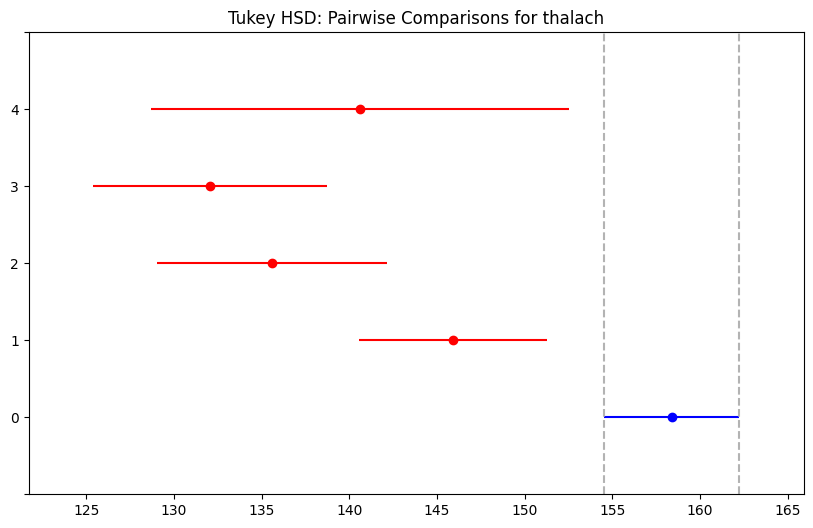


🎯 INTERPRETATION OF SIGNIFICANT DIFFERENCES:
  Group 1 has 12.5 lower thalach than Group 0 (p=0.0012)
  Group 2 has 22.8 lower thalach than Group 0 (p=0.0000)
  Group 3 has 26.3 lower thalach than Group 0 (p=0.0000)
  Group 4 has 17.8 lower thalach than Group 0 (p=0.0242)
  Group 3 has 13.9 lower thalach than Group 1 (p=0.0167)

🩺 ANALYSIS: OLDPEAK
📊 Statistics:
  count: 303.00
  mean: 1.04
  std: 1.16
  min: 0.00
  25%: 0.00
  50%: 0.80
  75%: 1.60
  max: 6.20
🚨 Outliers: 5 (1.7%)
📈 ANOVA: p-value = 0.0000 ***

🔬 Post-hoc analysis: Tukey HSD
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1   0.4189 0.0602  -0.011 0.8487  False
     0      2    1.194    0.0  0.6862 1.7017   True
     0      3   1.3763    0.0  0.8626 1.8899   True
     0      4    1.775    0.0  0.9801 2.5698   True
     1      2   0.7751 0.0034  0.1837 1.3665   True
     1      3   0.9574 0.0001  0.3

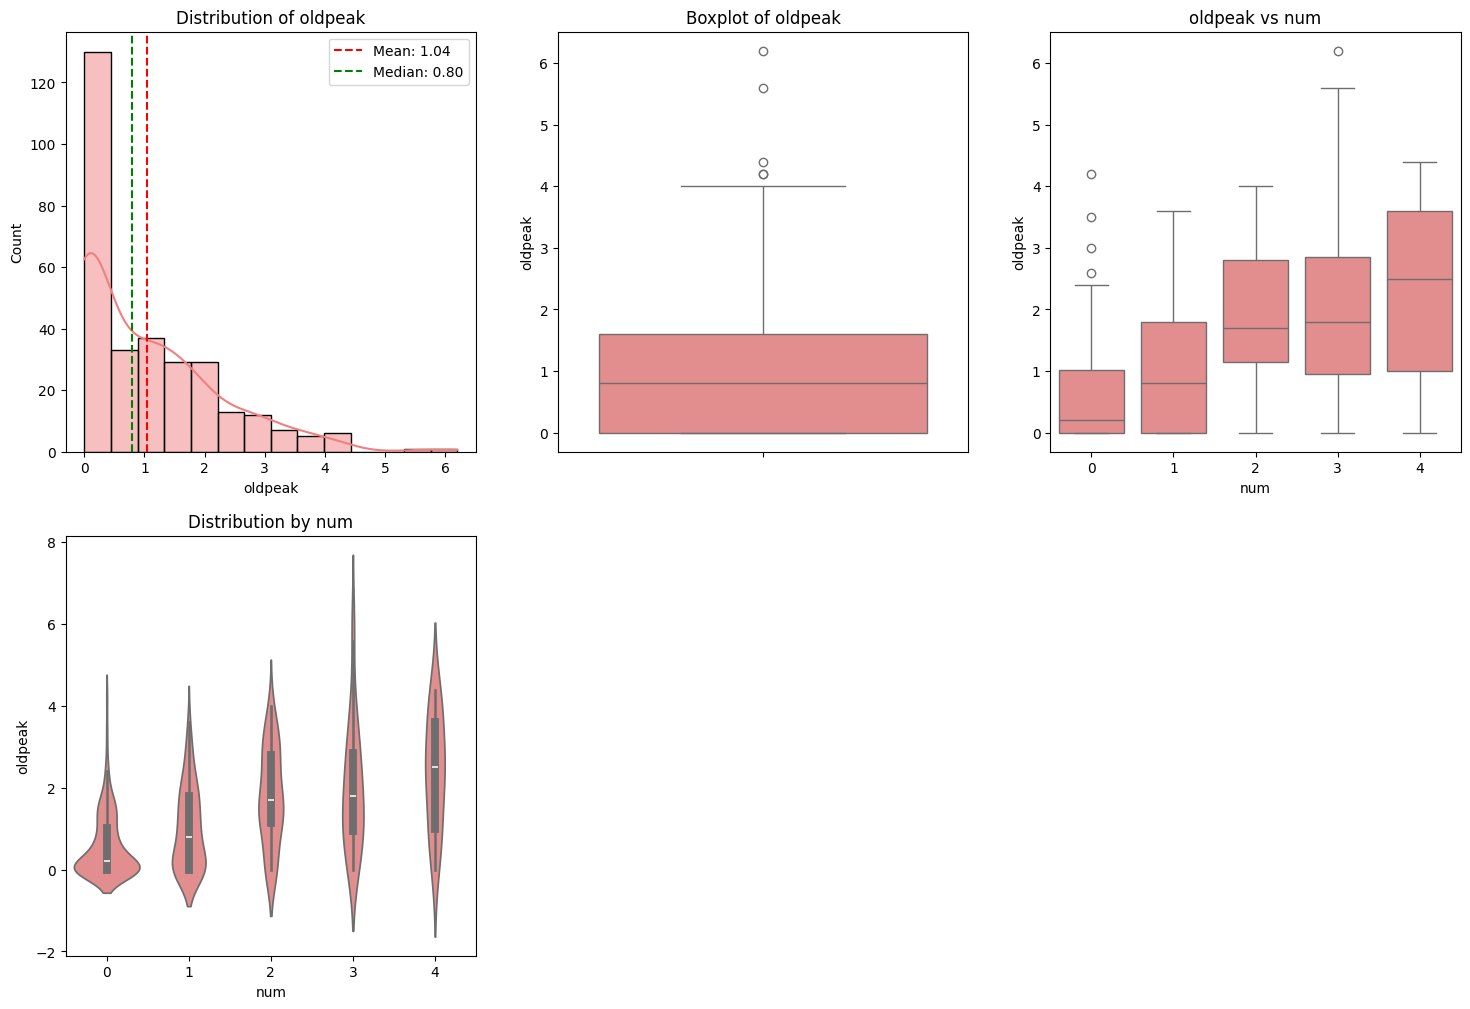

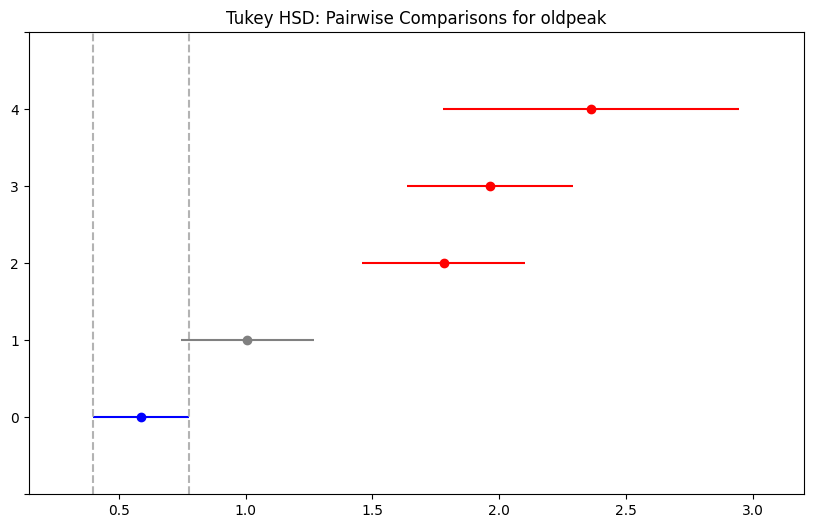


🎯 INTERPRETATION OF SIGNIFICANT DIFFERENCES:
  Group 2 has 1.2 higher oldpeak than Group 0 (p=0.0000)
  Group 3 has 1.4 higher oldpeak than Group 0 (p=0.0000)
  Group 4 has 1.8 higher oldpeak than Group 0 (p=0.0000)
  Group 2 has 0.8 higher oldpeak than Group 1 (p=0.0034)
  Group 3 has 1.0 higher oldpeak than Group 1 (p=0.0001)
  Group 4 has 1.4 higher oldpeak than Group 1 (p=0.0002)

📊 ANALYSIS OF CATEGORICAL VARIABLES

🩺 ANALYSIS: SEX
📊 Distribution:
  0.0: 97 (32.0%)
  1.0: 206 (68.0%)


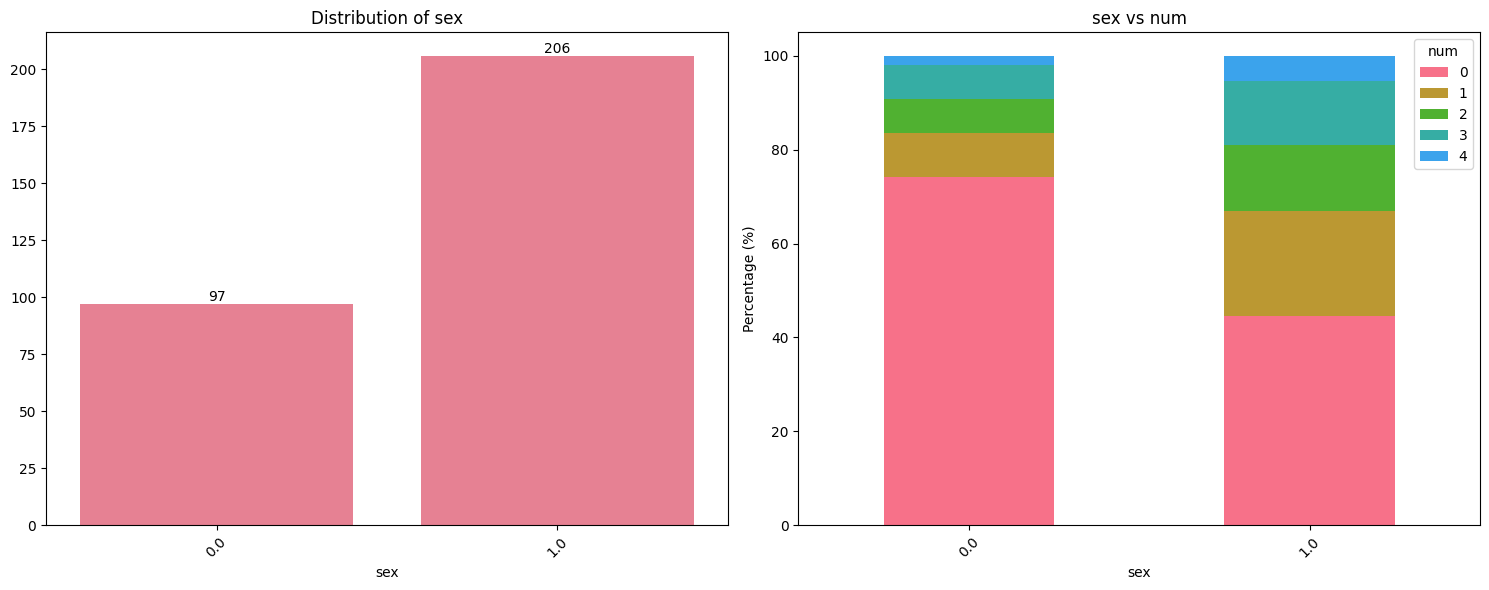

📊 Chi-Square: p-value = 0.0001 ***

🩺 ANALYSIS: CP
📊 Distribution:
  1.0: 23 (7.6%)
  2.0: 50 (16.5%)
  3.0: 86 (28.4%)
  4.0: 144 (47.5%)


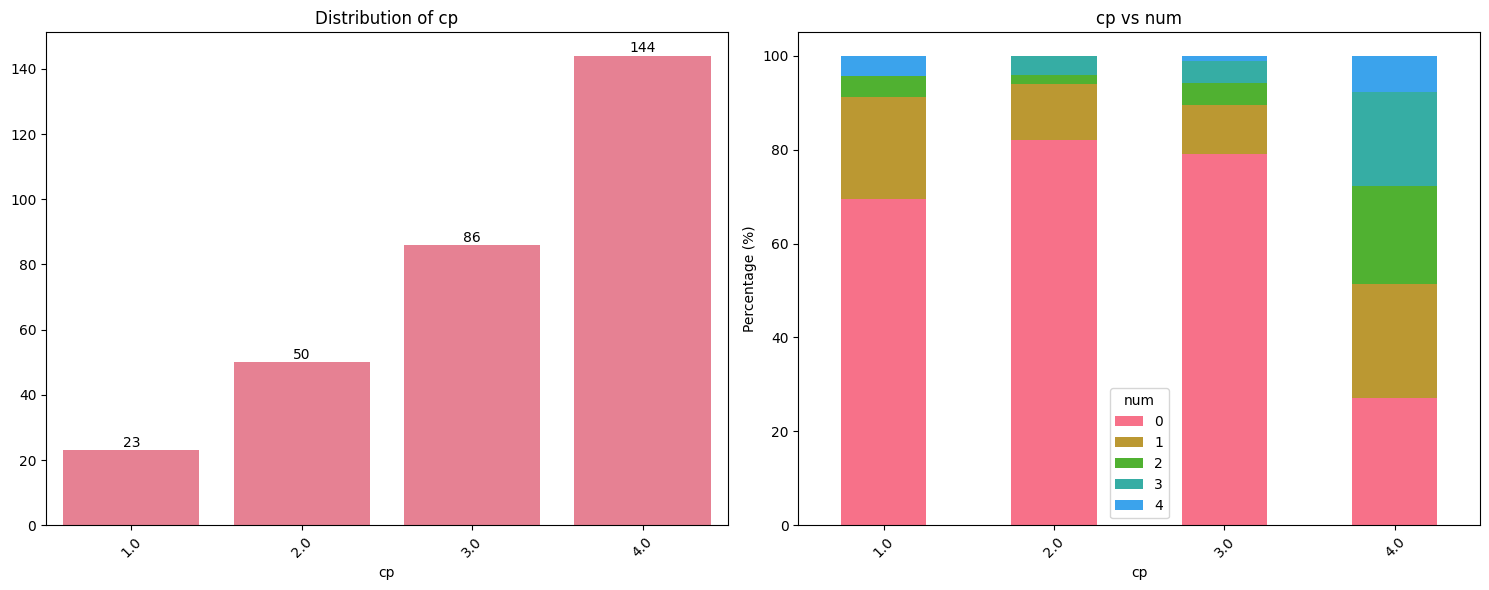

📊 Chi-Square: p-value = 0.0000 ***

🩺 ANALYSIS: FBS
📊 Distribution:
  0.0: 258 (85.1%)
  1.0: 45 (14.9%)


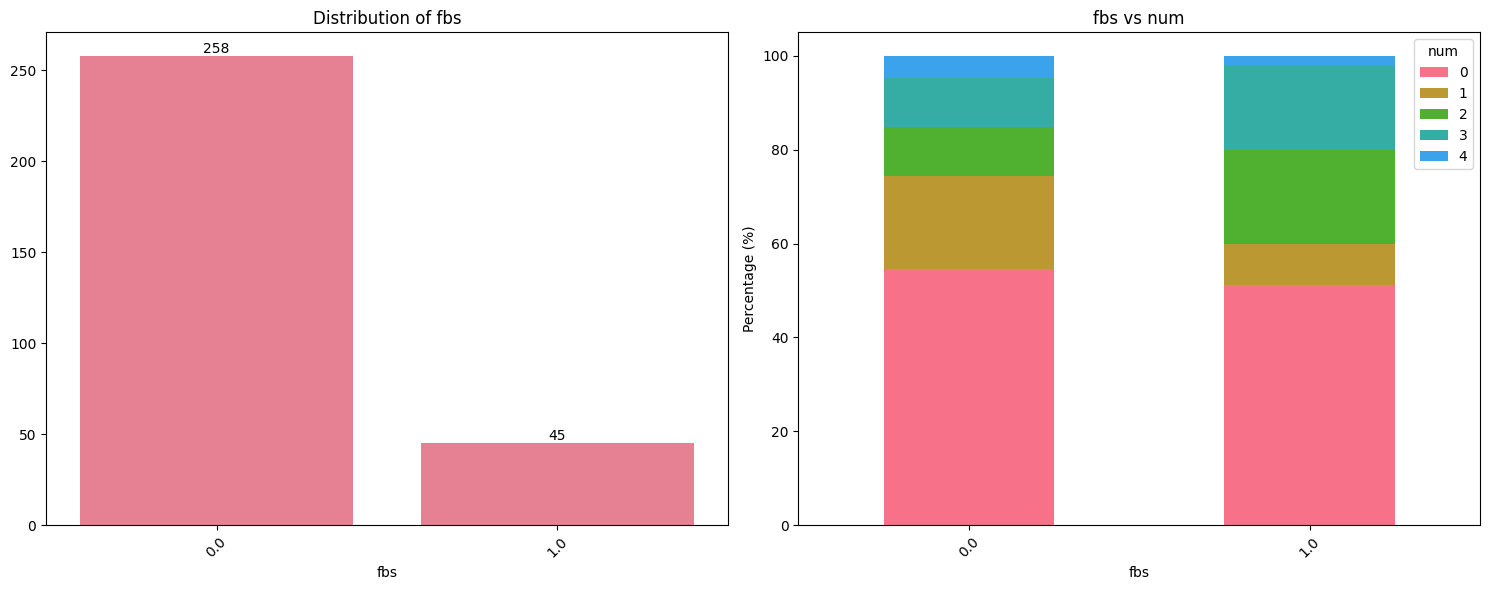

📊 Chi-Square: p-value = 0.0984 n.s.

🩺 ANALYSIS: RESTECG
📊 Distribution:
  0.0: 151 (49.8%)
  1.0: 4 (1.3%)
  2.0: 148 (48.8%)


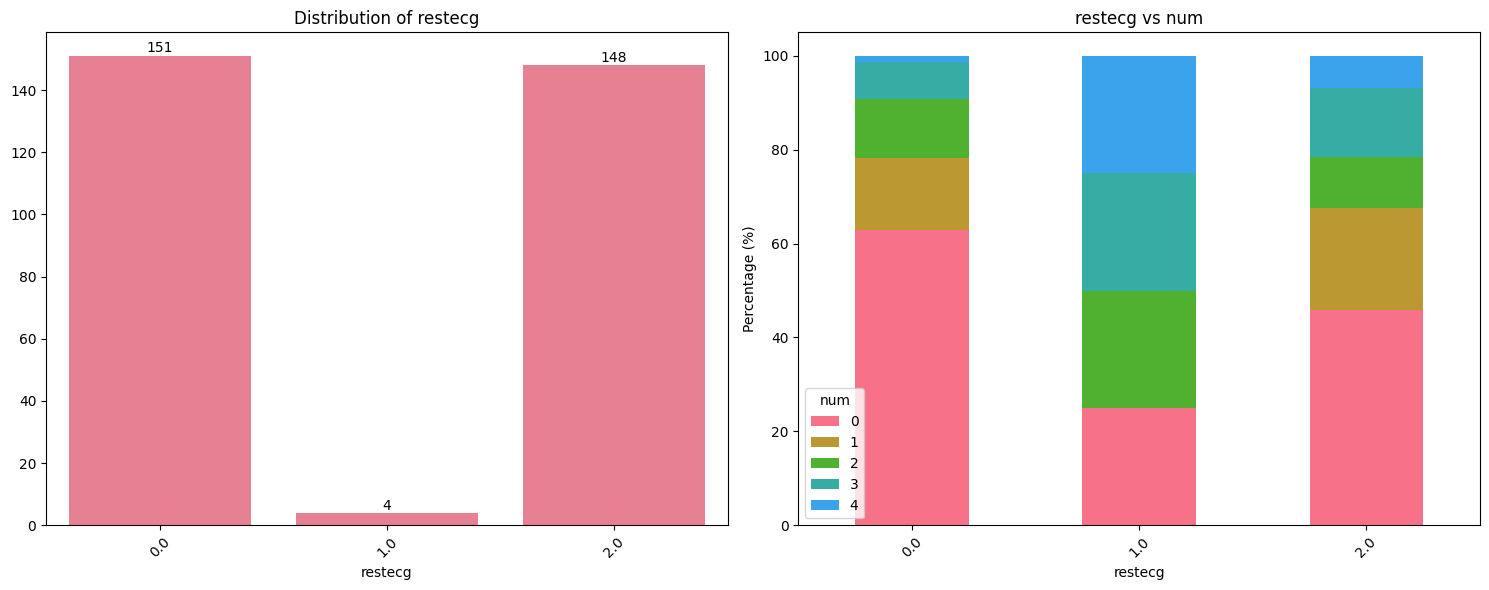

📊 Chi-Square: p-value = 0.0079 **

🩺 ANALYSIS: EXANG
📊 Distribution:
  0.0: 204 (67.3%)
  1.0: 99 (32.7%)


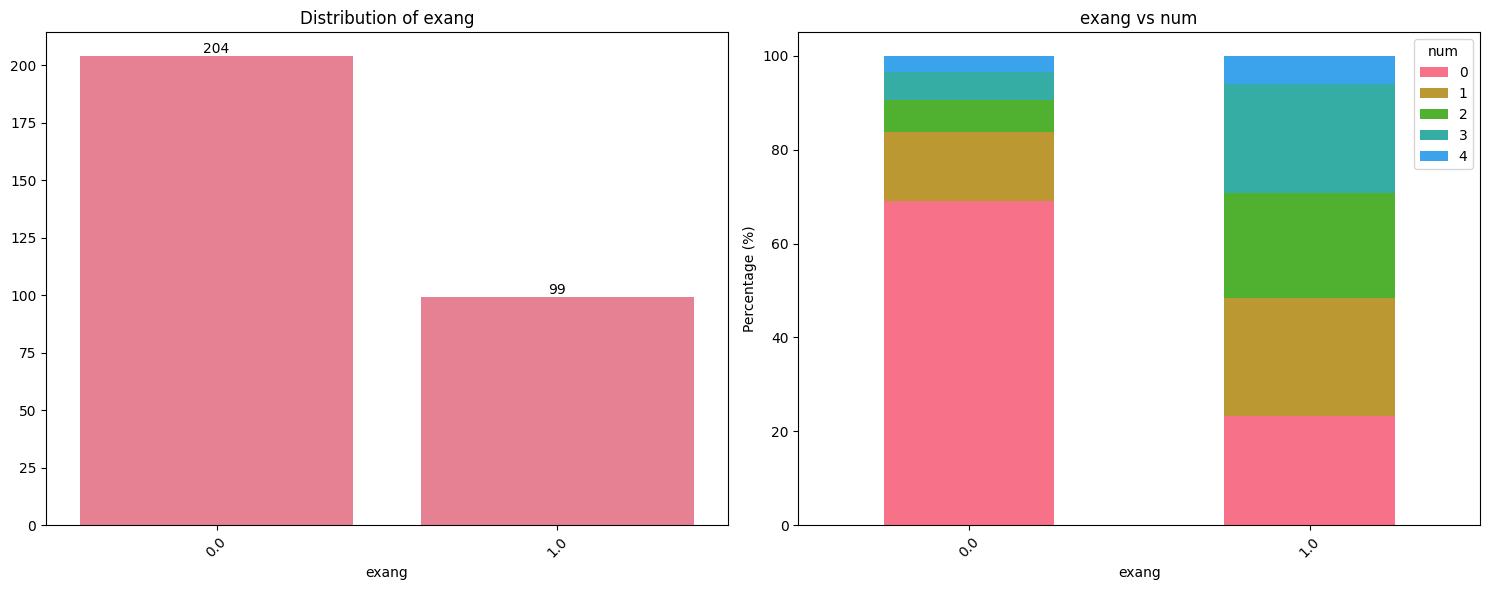

📊 Chi-Square: p-value = 0.0000 ***

🩺 ANALYSIS: SLOPE
📊 Distribution:
  1.0: 142 (46.9%)
  2.0: 140 (46.2%)
  3.0: 21 (6.9%)


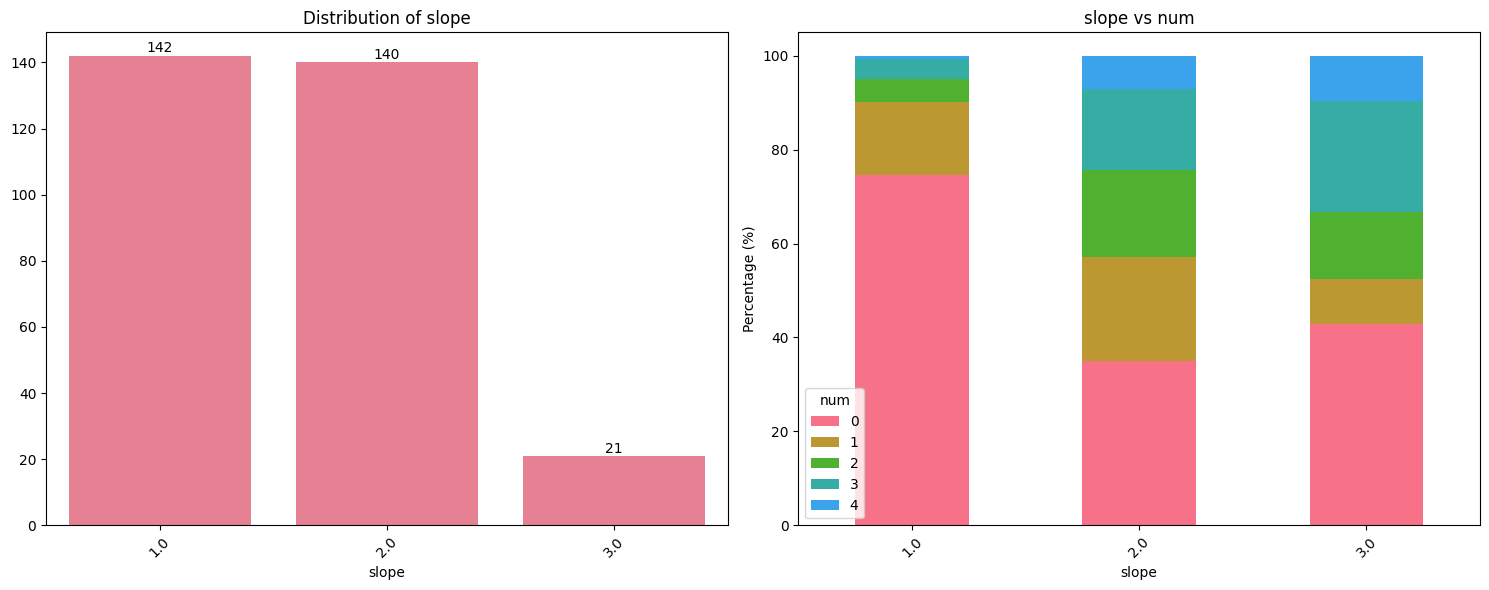

📊 Chi-Square: p-value = 0.0000 ***

🩺 ANALYSIS: CA
📊 Distribution:
  0.0: 178 (58.7%)
  1.0: 67 (22.1%)
  2.0: 38 (12.5%)
  3.0: 20 (6.6%)


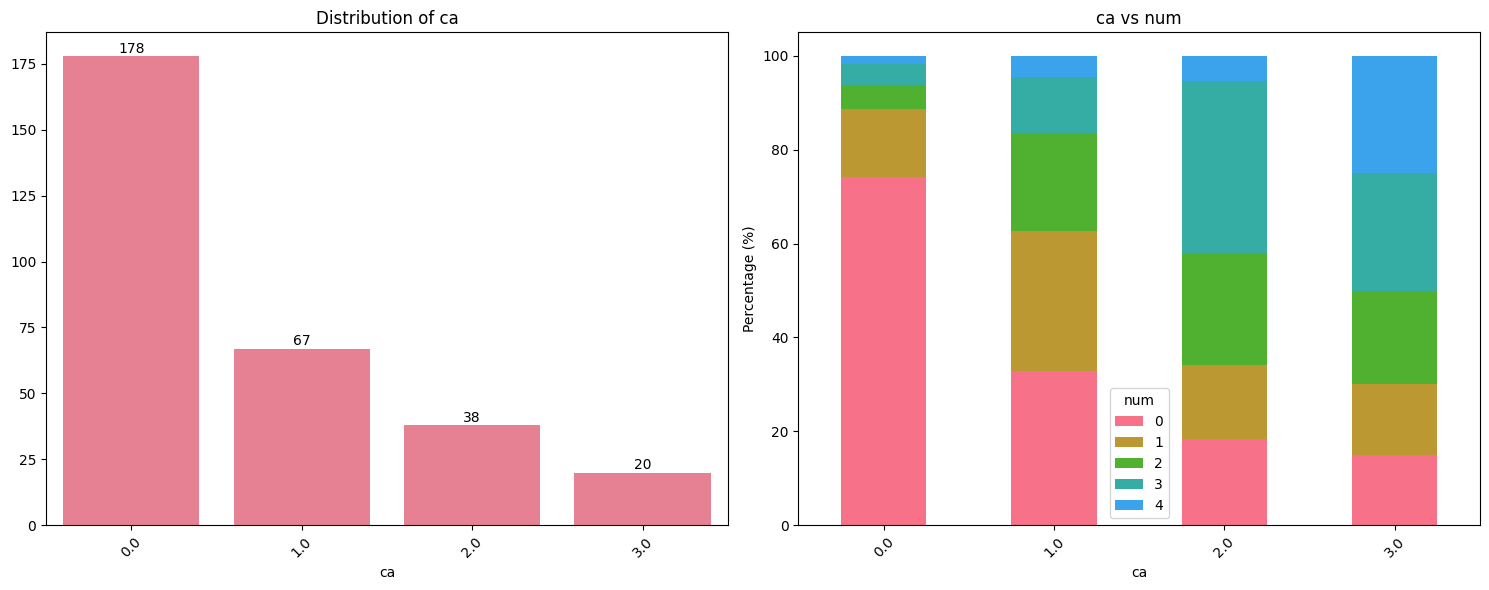

📊 Chi-Square: p-value = 0.0000 ***

🩺 ANALYSIS: THAL
📊 Distribution:
  3.0: 166 (54.8%)
  6.0: 18 (5.9%)
  7.0: 117 (38.6%)
  nan: 2 (0.7%)


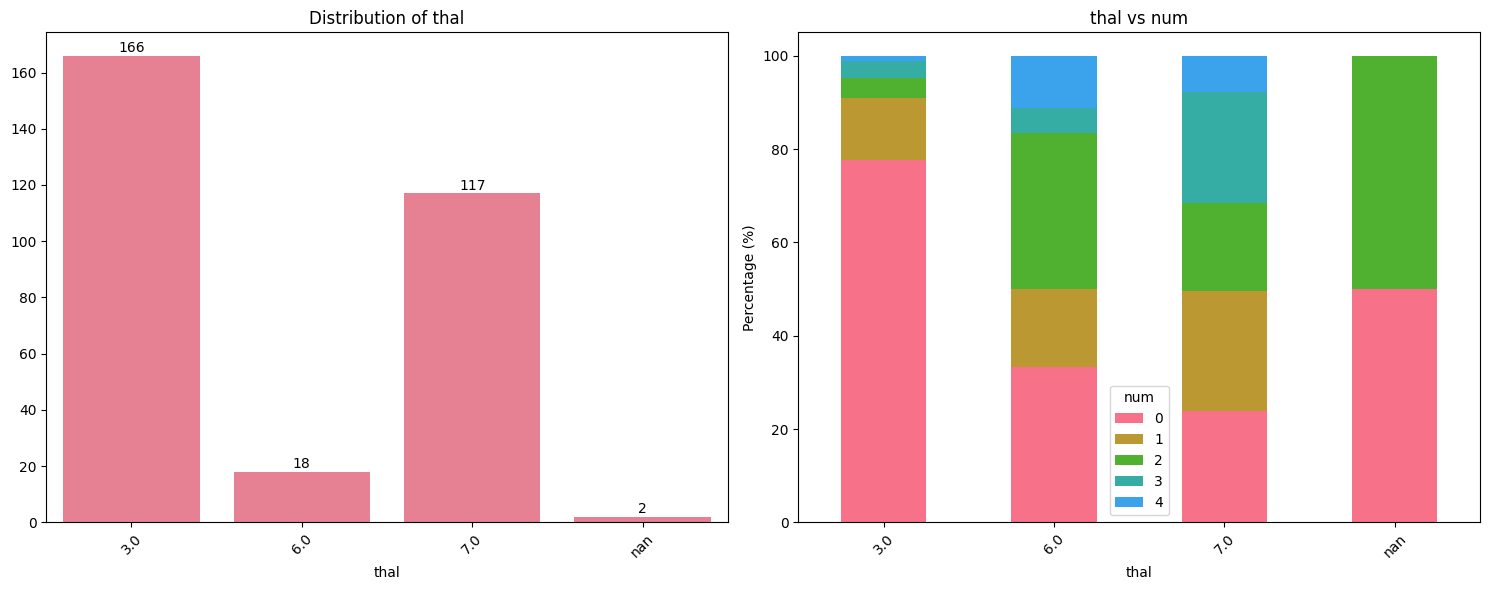

📊 Chi-Square: p-value = 0.0000 ***

🔗 GLOBAL CORRELATIONS


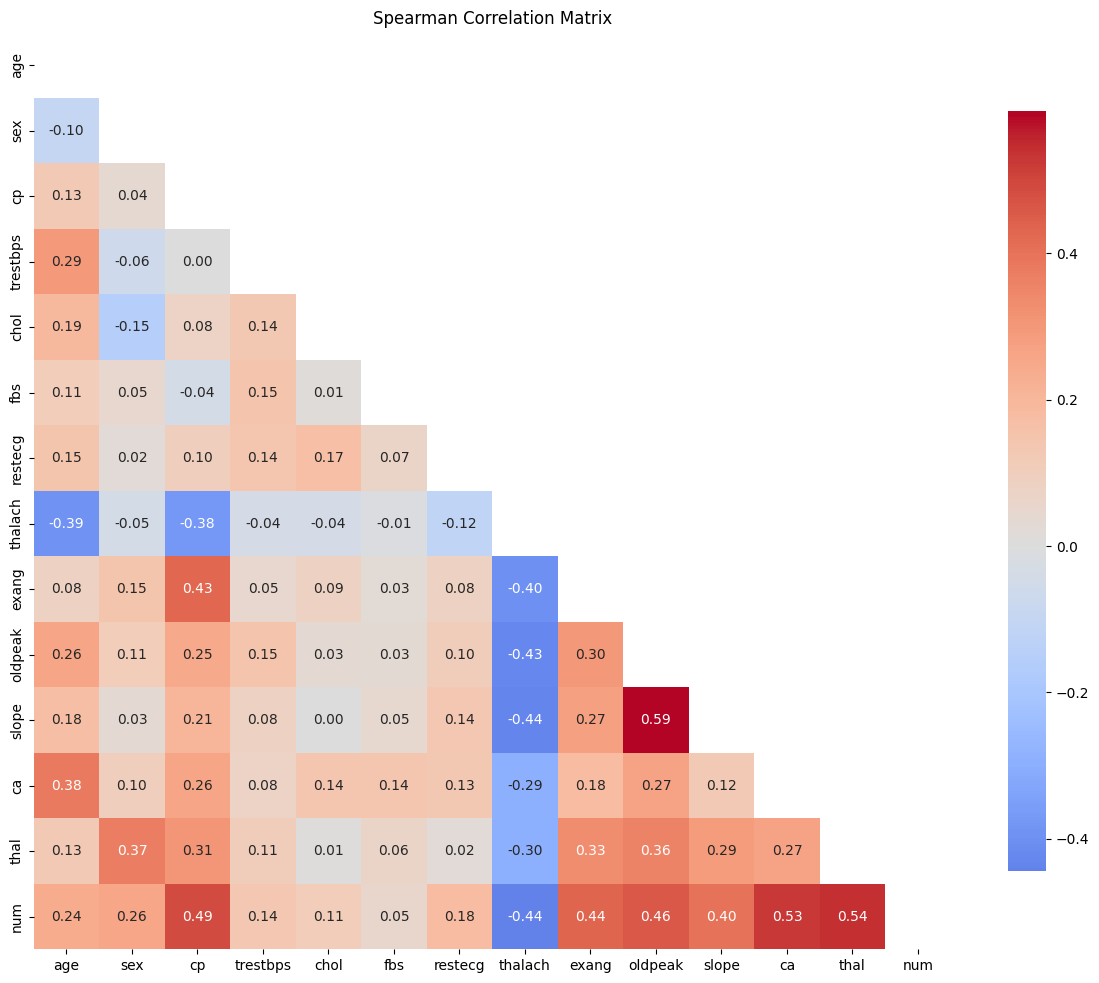


🎯 CORRELATIONS WITH NUM:
  ca: 0.519 (+)
  thal: 0.510 (+)
  oldpeak: 0.504 (+)
  thalach: 0.415 (-)
  cp: 0.407 (+)
  exang: 0.397 (+)
  slope: 0.378 (+)
  sex: 0.224 (+)
  age: 0.223 (+)

⚖️ FAIRNESS ANALYSIS

👥 BY SEX:
  Male: {0: 74.2, 1: 9.3, 2: 7.2, 3: 7.2, 4: 2.1}
  Male: {0: 44.7, 1: 22.3, 2: 14.1, 3: 13.6, 4: 5.3}

👴 BY AGE GROUP:
  <40: {0: 66.7, 1: 16.7, 2: 0.0, 3: 11.1, 4: 5.6}
  40-50: {0: 69.7, 1: 14.5, 2: 6.6, 3: 7.9, 4: 1.3}
  50-60: {0: 49.2, 1: 20.8, 2: 13.1, 3: 13.1, 4: 3.8}
  60-70: {0: 41.1, 1: 19.2, 2: 19.2, 3: 13.7, 4: 6.8}
  70+: {0: 83.3, 1: 0.0, 2: 0.0, 3: 0.0, 4: 16.7}

❤️ BY CHEST PAIN TYPE:
  Asymptomatic: {0: 27.1, 1: 24.3, 2: 20.8, 3: 20.1, 4: 7.6}
  Atypical Angina: {0: 82.0, 1: 12.0, 2: 2.0, 3: 4.0, 4: 0.0}
  Non-anginal Pain: {0: 79.1, 1: 10.5, 2: 4.7, 3: 4.7, 4: 1.2}
  Typical Angina: {0: 69.6, 1: 21.7, 2: 4.3, 3: 0.0, 4: 4.3}

📋 STAGE 2 SUMMARY

✅ ANALYSIS COMPLETED:
  • 5 numerical variables
  • 8 categorical variables
  • Target: num (5 classes)



In [18]:
# =============================================================================
# STAGE 2: EXPLORATORY AND STATISTICAL ANALYSIS - VARIABLE ORIENTED
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Visualization settings
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("🔍 STARTING STAGE 2: EXPLORATORY AND STATISTICAL ANALYSIS")

# =============================================================================
# TARGET BALANCE ANALYSIS
# =============================================================================

print("\n⚖️ TARGET BALANCE ANALYSIS")
print("=" * 70)

# Count and percentage of each class
target_counts = df_analysis[target_col].value_counts().sort_index()
target_percent = (target_counts / len(df_analysis) * 100).round(1)

# Display as table
target_summary = pd.DataFrame({
    'Count': target_counts,
    'Percent (%)': target_percent
})
display(target_summary)

# Visualization
plt.figure(figsize=(8, 5))
sns.barplot(x=target_counts.index.astype(str), y=target_counts.values, palette="coolwarm")
for i, v in enumerate(target_counts.values):
    plt.text(i, v + 1, f"{v} ({target_percent.iloc[i]}%)", ha='center', va='bottom', fontsize=10)
plt.title(f"Distribution of Target Variable: '{target_col}'", fontsize=14)
plt.xlabel("Target Class (Disease Severity)")
plt.ylabel("Number of Patients")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Interpretative summary
major_class = target_counts.idxmax()
minor_class = target_counts.idxmin()
imbalance_ratio = round(target_counts.max() / target_counts.min(), 2)

print(f"\n📊 Target Distribution Summary:")
print(f"  • Total patients: {len(df_analysis)}")
print(f"  • Majority class: {major_class} ({target_percent[major_class]}%)")
print(f"  • Minority class: {minor_class} ({target_percent[minor_class]}%)")
print(f"  • Imbalance ratio (max/min): {imbalance_ratio}x")

# Interpretation
if imbalance_ratio > 2:
    print("🚨 Warning: Target distribution is imbalanced — consider using class weights or oversampling.")
elif imbalance_ratio > 1.5:
    print("⚠️ Moderate imbalance detected — model may still perform fine with stratified split.")
else:
    print("✅ Target distribution is reasonably balanced.")




# Define target column directly
target_col = 'num'
print(f"🎯 Target: {target_col}")
print(f"📊 Unique values: {df[target_col].value_counts().sort_index()}")

# =============================================================================
# PRE-PROCESSING
# =============================================================================

print("🛠️  Pre-processing...")

# Copy dataframe for analysis
df_analysis = df.copy()

# Convert target to numeric if needed
if df_analysis[target_col].dtype.name == 'category':
    df_analysis[target_col] = df_analysis[target_col].astype('float64')

# =============================================================================
# FUNCTIONS FOR VARIABLE ANALYSIS
# =============================================================================
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison

def analyze_target_groups(df, target_col, age_col='age'):
    """Detailed analysis of target groups with age distributions"""
    print(f"\n{'='*60}")
    print(f"🎯 TARGET GROUP ANALYSIS: {target_col.upper()}")
    print(f"{'='*60}")

    # Group statistics
    group_stats = df.groupby(target_col)[age_col].agg(['count', 'mean', 'std', 'min', 'max']).round(2)
    group_stats['percentage'] = (group_stats['count'] / len(df) * 100).round(1)

    print("📊 Group Composition:")
    for group_val, stats in group_stats.iterrows():
        print(f"  Group {group_val}: {stats['count']} patients ({stats['percentage']}%)")
        print(f"    Age: {stats['mean']} ± {stats['std']} years (range: {stats['min']}-{stats['max']})")

    # Age distribution by group
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # 1. Boxplot by group
    sns.boxplot(data=df, x=target_col, y=age_col, ax=axes[0,0])
    axes[0,0].set_title(f'Age Distribution by {target_col} Group')
    axes[0,0].set_xlabel('Target Group')
    axes[0,0].set_ylabel('Age')

    # 2. Violin plot
    sns.violinplot(data=df, x=target_col, y=age_col, ax=axes[0,1])
    axes[0,1].set_title(f'Age Density by {target_col} Group')
    axes[0,1].set_xlabel('Target Group')
    axes[0,1].set_ylabel('Age')

    # 3. Age groups analysis
    df_temp = df.copy()
    age_bins = [0, 40, 50, 60, 70, 100]
    age_labels = ['<40', '40-49', '50-59', '60-69', '70+']
    df_temp['age_group'] = pd.cut(df_temp[age_col], bins=age_bins, labels=age_labels)

    # Cross-tabulation: age group vs target
    cross_tab = pd.crosstab(df_temp['age_group'], df_temp[target_col], normalize='index') * 100

    # 4. Heatmap of probabilities
    sns.heatmap(cross_tab, annot=True, fmt='.1f', cmap='YlOrRd', ax=axes[1,0])
    axes[1,0].set_title(f'Probability of Each Group by Age (%)')
    axes[1,0].set_xlabel('Target Group')
    axes[1,0].set_ylabel('Age Group')

    # 5. Stacked bar chart
    cross_tab.plot(kind='bar', stacked=True, ax=axes[1,1], colormap='viridis')
    axes[1,1].set_title(f'Group Distribution by Age Group')
    axes[1,1].set_xlabel('Age Group')
    axes[1,1].set_ylabel('Percentage (%)')
    axes[1,1].legend(title='Target Group')
    axes[1,1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

    # Print probability analysis
    print(f"\n📈 PROBABILITY ANALYSIS BY AGE GROUP:")
    for age_group in cross_tab.index:
        row = cross_tab.loc[age_group]
        max_prob_group = row.idxmax()
        max_prob = row.max()
        print(f"  {age_group} years:")
        for group_val, prob in row.items():
            if prob > 0:
                marker = " 🎯" if group_val == max_prob_group else ""
                print(f"    Group {group_val}: {prob:.1f}%{marker}")

    return group_stats, cross_tab


def analyze_numeric_variable(df, variable, target_col):
    """Complete analysis for a numeric variable with post-hoc Tukey after ANOVA"""
    print(f"\n{'='*60}")
    print(f"🩺 ANALYSIS: {variable.upper()}")
    print(f"{'='*60}")

    # 1. DESCRIPTIVE STATISTICS
    print(f"📊 Statistics:")
    desc = df[variable].describe()
    for stat, value in desc.items():
        print(f"  {stat}: {value:.2f}")

    # 2. VISUALIZATIONS
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # Added one more subplot

    # Histogram
    sns.histplot(data=df, x=variable, kde=True, color='lightcoral', ax=axes[0,0])
    axes[0,0].axvline(df[variable].mean(), color='red', linestyle='--', label=f'Mean: {df[variable].mean():.2f}')
    axes[0,0].axvline(df[variable].median(), color='green', linestyle='--', label=f'Median: {df[variable].median():.2f}')
    axes[0,0].set_title(f'Distribution of {variable}')
    axes[0,0].legend()

    # Boxplot
    sns.boxplot(data=df, y=variable, color='lightcoral', ax=axes[0,1])
    axes[0,1].set_title(f'Boxplot of {variable}')

    # 3. OUTLIERS
    Q1 = df[variable].quantile(0.25)
    Q3 = df[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[variable] < lower_bound) | (df[variable] > upper_bound)]
    print(f"🚨 Outliers: {len(outliers)} ({len(outliers)/len(df)*100:.1f}%)")

    # 4. RELATIONSHIP WITH TARGET
    sns.boxplot(data=df, x=target_col, y=variable, color='lightcoral', ax=axes[0,2])
    axes[0,2].set_title(f'{variable} vs {target_col}')

    sns.violinplot(data=df, x=target_col, y=variable, color='lightcoral', ax=axes[1,0])
    axes[1,0].set_title(f'Distribution by {target_col}')

    # 5. PROBABILITY ANALYSIS BY QUARTILES (NEW)
    if variable == 'age':  # Special analysis for age
        df_temp = df.copy()
        df_temp['age_quartile'] = pd.qcut(df_temp[variable], q=4, labels=['Q1 (Youngest)', 'Q2', 'Q3', 'Q4 (Oldest)'])
        prob_table = pd.crosstab(df_temp['age_quartile'], df_temp[target_col], normalize='index') * 100

        prob_table.plot(kind='bar', stacked=True, ax=axes[1,1], colormap='Set3')
        axes[1,1].set_title(f'Target Distribution by Age Quartiles')
        axes[1,1].set_xlabel('Age Quartile')
        axes[1,1].set_ylabel('Percentage (%)')
        axes[1,1].legend(title='Target Group')
        axes[1,1].tick_params(axis='x', rotation=45)

        # Add probability table
        axes[1,2].axis('off')
        cell_text = []
        for quartile in prob_table.index:
            row = [f"{prob:.1f}%" for prob in prob_table.loc[quartile]]
            cell_text.append(row)

        table = axes[1,2].table(cellText=cell_text,
                              rowLabels=prob_table.index,
                              colLabels=[f'Group {col}' for col in prob_table.columns],
                              cellLoc='center',
                              loc='center')
        table.auto_set_font_size(False)
        table.set_fontsize(9)
        table.scale(1, 1.5)
        axes[1,2].set_title('Probability by Age Quartile (%)')

    else:
        # Hide the unused subplots for other variables
        axes[1,1].axis('off')
        axes[1,2].axis('off')

    # 6. STATISTICAL TESTS (seu código existente continua aqui...)
    unique_targets = sorted(df[target_col].unique())

    if len(unique_targets) == 2:
        # t-test for binary target
        group_0 = df[df[target_col] == unique_targets[0]][variable]
        group_1 = df[df[target_col] == unique_targets[1]][variable]
        t_stat, p_value = stats.ttest_ind(group_0, group_1)
        print(f"📈 t-test: p-value = {p_value:.4f} {'***' if p_value < 0.001 else '**' if p_value < 0.01 else '*' if p_value < 0.05 else 'n.s.'}")

    else:
        # ANOVA for multiclass target
        groups = [df[df[target_col] == val][variable] for val in unique_targets]
        f_stat, p_value = stats.f_oneway(*groups)
        print(f"📈 ANOVA: p-value = {p_value:.4f} {'***' if p_value < 0.001 else '**' if p_value < 0.01 else '*' if p_value < 0.05 else 'n.s.'}")

        # --- Post-hoc Tukey HSD test ---
        if p_value < 0.05:
            print("\n🔬 Post-hoc analysis: Tukey HSD")
            try:
                tukey = pairwise_tukeyhsd(endog=df[variable],
                                          groups=df[target_col],
                                          alpha=0.05)
                print(tukey.summary())

                # Plot confidence intervals
                fig = tukey.plot_simultaneous(comparison_name=unique_targets[0])
                plt.title(f"Tukey HSD: Pairwise Comparisons for {variable}")
                plt.show()

                # ADDED: Detailed group comparison interpretation
                print("\n🎯 INTERPRETATION OF SIGNIFICANT DIFFERENCES:")
                tukey_df = pd.DataFrame(data=tukey._results_table.data[1:],
                                      columns=tukey._results_table.data[0])
                significant = tukey_df[tukey_df['reject'] == True]

                for _, row in significant.iterrows():
                    group1, group2 = int(row['group1']), int(row['group2'])
                    mean_diff = row['meandiff']
                    p_adj = row['p-adj']
                    print(f"  Group {group2} has {abs(mean_diff):.1f} {'higher' if mean_diff > 0 else 'lower'} {variable} than Group {group1} (p={p_adj:.4f})")

            except Exception as e:
                print(f"⚠️ Tukey test could not be computed: {e}")

def analyze_categorical_variable(df, variable, target_col):
    """Complete analysis for a categorical variable"""
    print(f"\n{'='*60}")
    print(f"🩺 ANALYSIS: {variable.upper()}")
    print(f"{'='*60}")

    # Convert to string
    df_temp = df.copy()
    df_temp[variable] = df_temp[variable].astype(str)

    # 1. DISTRIBUTION
    value_counts = df_temp[variable].value_counts().sort_index()
    print(f"📊 Distribution:")
    for value, count in value_counts.items():
        percentage = (count / len(df_temp)) * 100
        print(f"  {value}: {count} ({percentage:.1f}%)")

    # 2. VISUALIZATIONS
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Bar plot
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[0])
    axes[0].set_title(f'Distribution of {variable}')
    axes[0].tick_params(axis='x', rotation=45)

    for i, count in enumerate(value_counts.values):
        axes[0].text(i, count + 0.1, str(count), ha='center', va='bottom')

    # Relationship with target
    cross_tab = pd.crosstab(df_temp[variable], df_temp[target_col], normalize='index') * 100
    cross_tab.plot(kind='bar', stacked=True, ax=axes[1])
    axes[1].set_title(f'{variable} vs {target_col}')
    axes[1].set_ylabel('Percentage (%)')
    axes[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

    # 3. CHI-SQUARE TEST
    contingency_table = pd.crosstab(df_temp[variable], df_temp[target_col])
    chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

    print(f"📊 Chi-Square: p-value = {p_value:.4f} {'***' if p_value < 0.001 else '**' if p_value < 0.01 else '*' if p_value < 0.05 else 'n.s.'}")

# =============================================================================
# VARIABLE IDENTIFICATION - CLEAN VERSION
# =============================================================================

# NUMERIC VARIABLES (continuous or many unique values)
numeric_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
numeric_features = [col for col in numeric_features if col in df_analysis.columns and col != target_col]

# CATEGORICAL VARIABLES (discrete values with categorical meaning)
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
categorical_features = [col for col in categorical_features if col in df_analysis.columns and col != target_col]

print(f"📋 VARIABLES FOR ANALYSIS:")
print(f"  Numerical: {numeric_features}")
print(f"  Categorical: {categorical_features}")

# =============================================================================
# CLINICAL JUSTIFICATION
# =============================================================================

print(f"\n🎯 CLINICAL JUSTIFICATION OF VARIABLE CLASSIFICATION:")

print(f"\n📈 NUMERICAL VARIABLES (Distribution, Outliers, Correlation):")
for var in numeric_features:
    if var == 'age': print(f"  • age: Age in years – continuous variable")
    elif var == 'trestbps': print(f"  • trestbps: Resting blood pressure – continuous")
    elif var == 'chol': print(f"  • chol: Serum cholesterol – continuous (mg/dl)")
    elif var == 'thalach': print(f"  • thalach: Maximum heart rate – continuous")
    elif var == 'oldpeak': print(f"  • oldpeak: ST depression – continuous")

print(f"\n📊 CATEGORICAL VARIABLES (Frequency, Chi-Square):")
for var in categorical_features:
    if var == 'sex': print(f"  • sex: Biological sex – binary categorical")
    elif var == 'cp': print(f"  • cp: Chest pain type – ordinal categorical (1-4)")
    elif var == 'fbs': print(f"  • fbs: Fasting blood sugar – binary")
    elif var == 'restecg': print(f"  • restecg: Resting ECG result – nominal categorical")
    elif var == 'exang': print(f"  • exang: Exercise-induced angina – binary")
    elif var == 'slope': print(f"  • slope: ST segment slope – ordinal categorical")
    elif var == 'ca': print(f"  • ca: Number of colored vessels – ordinal categorical (0-3)")
    elif var == 'thal': print(f"  • thal: Thallium test result – nominal categorical")

# =============================================================================
# EXECUTE ANALYSIS
# =============================================================================

print("\n" + "="*80)
print("📈 ANALYSIS OF NUMERICAL VARIABLES")
print("="*80)

# Analyze target groups with age distribution
group_stats, probability_table = analyze_target_groups(df_analysis, target_col, 'age')

for variable in numeric_features:
    analyze_numeric_variable(df_analysis, variable, target_col)

print("\n" + "="*80)
print("📊 ANALYSIS OF CATEGORICAL VARIABLES")
print("="*80)

for variable in categorical_features:
    analyze_categorical_variable(df_analysis, variable, target_col)

# =============================================================================
# GLOBAL CORRELATIONS
# =============================================================================

print("\n" + "="*80)
print("🔗 GLOBAL CORRELATIONS")
print("="*80)

numeric_cols = df_analysis.select_dtypes(include=[np.number]).columns.tolist()

if len(numeric_cols) > 1:
    correlation_matrix = df_analysis[numeric_cols].corr(method='spearman')

    plt.figure(figsize=(12, 10))
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
                square=True, fmt='.2f', cbar_kws={"shrink": .8})
    plt.title('Spearman Correlation Matrix')
    plt.tight_layout()
    plt.show()

    print(f"\n🎯 CORRELATIONS WITH {target_col.upper()}:")
    target_corr = df_analysis[numeric_cols].corrwith(df_analysis[target_col]).abs().sort_values(ascending=False)
    target_corr = target_corr[target_corr.index != target_col]

    for col, corr in target_corr.items():
        if abs(corr) > 0.2:
            actual_corr = df_analysis[col].corr(df_analysis[target_col])
            direction = "+" if actual_corr > 0 else "-"
            print(f"  {col}: {corr:.3f} ({direction})")

# =============================================================================
# FAIRNESS ANALYSIS
# =============================================================================

print("\n" + "="*80)
print("⚖️ FAIRNESS ANALYSIS")
print("="*80)

# By Sex
if 'sex' in df_analysis.columns:
    print(f"\n👥 BY SEX:")
    df_temp = df_analysis.copy()
    df_temp['sex'] = df_temp['sex'].astype(str)

    cross_tab = pd.crosstab(df_temp['sex'], df_temp[target_col], normalize='index') * 100
    for sex in cross_tab.index:
        dist = cross_tab.loc[sex]
        sex_label = 'Female' if sex == '0' else 'Male'
        formatted_dist = {int(k): float(f"{v:.1f}") for k, v in dist.items()}
        print(f"  {sex_label}: {formatted_dist}")

# By Age Group
if 'age' in df_analysis.columns:
    print(f"\n👴 BY AGE GROUP:")
    df_temp = df_analysis.copy()
    df_temp['age'] = pd.to_numeric(df_temp['age'], errors='coerce')
    df_temp = df_temp.dropna(subset=['age'])

    df_temp['age_group'] = pd.cut(
        df_temp['age'], bins=[0, 40, 50, 60, 70, 100],
        labels=['<40', '40-50', '50-60', '60-70', '70+']
    )

    cross_tab = pd.crosstab(df_temp['age_group'], df_temp[target_col], normalize='index') * 100
    for age_group in cross_tab.index:
        dist = cross_tab.loc[age_group]
        formatted_dist = {int(k): float(f"{v:.1f}") for k, v in dist.items()}
        print(f"  {age_group}: {formatted_dist}")

# By Chest Pain Type
if 'cp' in df_analysis.columns:
    print(f"\n❤️ BY CHEST PAIN TYPE:")
    df_temp = df_analysis.copy()
    cp_map = {'1.0': 'Typical Angina', '2.0': 'Atypical Angina',
              '3.0': 'Non-anginal Pain', '4.0': 'Asymptomatic'}
    df_temp['cp'] = df_temp['cp'].astype(str).map(cp_map)

    cross_tab = pd.crosstab(df_temp['cp'], df_temp[target_col], normalize='index') * 100
    for cp_type in cross_tab.index:
        dist = cross_tab.loc[cp_type]
        formatted_dist = {int(k): float(f"{v:.1f}") for k, v in dist.items()}
        print(f"  {cp_type}: {formatted_dist}")

# =============================================================================
# SUMMARY
# =============================================================================

print("\n" + "="*80)
print("📋 STAGE 2 SUMMARY")
print("="*80)

print(f"\n✅ ANALYSIS COMPLETED:")
print(f"  • {len(numeric_features)} numerical variables")
print(f"  • {len(categorical_features)} categorical variables")
print(f"  • Target: {target_col} ({len(df_analysis[target_col].unique())} classes)")

print(f"\n🎯 NEXT STEPS:")
print(f"  • Feature Engineering")
print(f"  • Model Preparation")

print("\n🏁 STAGE 2 COMPLETED!")


## Step 3 - Feature Engineering

## 📊 Interpretação dos resultados estatísticos — o que entra no train

Vamos traduzir os resultados da sua análise em decisões práticas para o modelo:

| Variável | Tipo | Significância | Correlação com num | Decisão para o modelo | Justificativa |
|----------|------|---------------|-------------------|---------------------|---------------|
| **age** | Numérica | ✅ p=0.0008 (ANOVA) | +0.223 | **Incluir** | Aumenta com severidade da doença |
| **trestbps** | Numérica | ❌ p=0.0898 | — | **Excluir** (ou opcional) | Levemente associado à idade, mas não discriminante |
| **chol** | Numérica | ❌ p=0.4848 | — | **Excluir** | Não diferencia grupos de doença |
| **thalach** | Numérica | ✅ p<0.001 | -0.415 | **Incluir** | Diminui conforme gravidade; forte indicador funcional |
| **oldpeak** | Numérica | ✅ p<0.001 | +0.504 | **Incluir** | Forte marcador de isquemia; um dos preditores mais importantes |
| **sex** | Categórica | ✅ p<0.001 | +0.224 | **Incluir** | Forte associação clínica (homens mais afetados) |
| **cp** | Categórica | ✅ p<0.001 | +0.407 | **Incluir** | Forte relação sintomática com a doença |
| **fbs** | Categórica | ❌ p=0.098 | — | **Incluir** (clinicamente relevante) | Diabetes é fator de risco conhecido |
| **restecg** | Categórica | ✅ p=0.0079 | — | **Incluir** | ECG alterado reflete cardiopatia estrutural |
| **exang** | Categórica | ✅ p<0.001 | +0.397 | **Incluir** | Forte marcador funcional |
| **slope** | Categórica | ✅ p<0.001 | +0.378 | **Incluir** | Indica padrão de recuperação ST — relevante |
| **ca** | Categórica | ✅ p<0.001 | +0.519 | **Incluir** | Maior número de vasos afetados → pior prognóstico |
| **thal** | Categórica | ✅ p<0.001 | +0.510 | **Incluir** | Teste Thallium é fortemente discriminante |

---

### 🎯 **Resumo das Decisões:**

**✅ INCLUIR NO MODELO (10 variáveis):**
- `age`, `thalach`, `oldpeak` → **Numéricas fortes**
- `sex`, `cp`, `fbs`, `restecg`, `exang`, `slope`, `ca`, `thal` → **Categóricas relevantes**

**❌ EXCLUIR DO MODELO (2 variáveis):**
- `trestbps`, `chol` → **Fracamente associadas**

**💡 Observação:** `fbs` será mantida por relevância clínica, apesar da significância estatística limítrofe.

### Etapa 3.1: Feature Engineering Base (Label + Age Group)


⚙️ FEATURE ENGINEERING: Creating Label and Age Risk Score

✅ Columns created:
  • label → binary indicator of disease presence (0=No disease, 1=Disease)
  • age_risk_score → continuous variable (empirical risk based on age trends)

📊 Distribution of label column:
  0: 164 patients (54.1%)
  1: 139 patients (45.9%)

📊 Statistics of age_risk_score:
count    303.000
mean       0.459
std        0.120
min        0.170
25%        0.300
50%        0.510
75%        0.510
max        0.590
Name: age_risk_score, dtype: float64


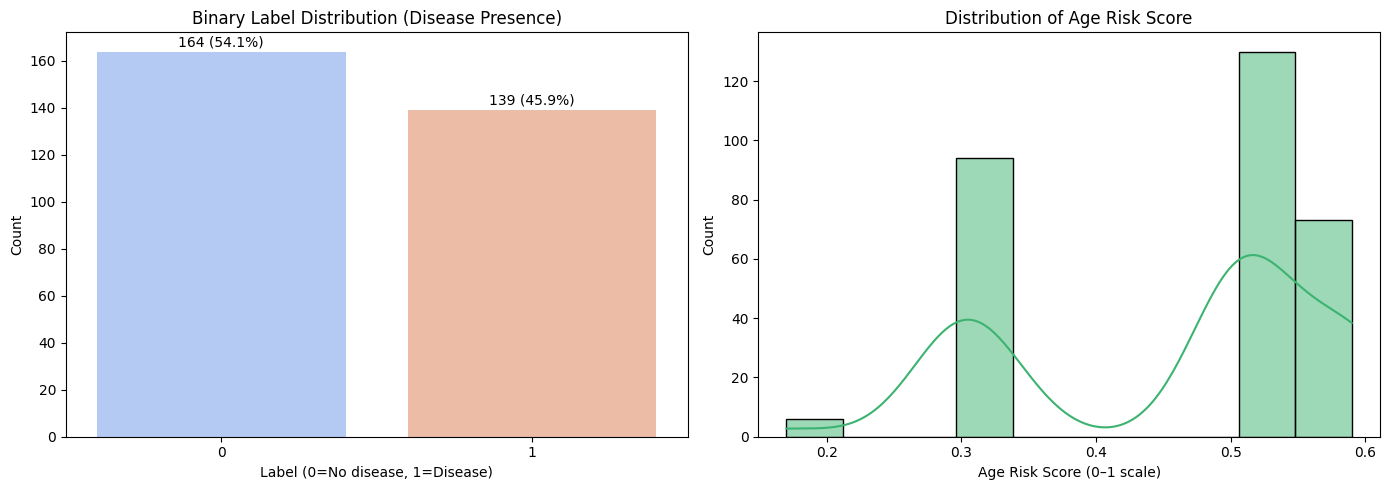


🎯 Feature Engineering Completed Successfully:
  → Added 'label' (binary) and 'age_risk_score' (continuous)
  → Removed 'age_group' categorical to prevent SMOTENC type errors
  → Total rows: 303
  → Columns ready for modeling: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num', 'label', 'age_group', 'age_risk_score']


In [32]:
# =========================================================
# ETAPA 3.1 — FEATURE ENGINEERING BASE (Atualizada com age_risk_score)
# =========================================================

print("\n⚙️ FEATURE ENGINEERING: Creating Label and Age Risk Score")
print("=" * 70)

# 1️⃣ Create binary label (presence of disease)
df['label'] = (df['num'] > 0).astype(int)

# 2️⃣ Define empirical risk mapping based on clinical + statistical analysis (Tukey & group heatmaps)
age_risk_map = {
    '<40': 0.33,   # 33% risco médio observado
    '40-49': 0.30, # 30%
    '50-59': 0.51, # 51%
    '60-69': 0.59, # 59%
    '70+': 0.17    # 17% (baixa, mas devido à amostra pequena)
}

# 3️⃣ Criar grupos de idade temporários (apenas para mapear o score)
age_bins = [0, 40, 50, 60, 70, 100]
age_labels = ['<40', '40-49', '50-59', '60-69', '70+']
df['age_group_temp'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

# Aplicar o mapeamento
df['age_risk_score'] = df['age_group_temp'].map(age_risk_map).astype(float)

# 4️⃣ Validar as novas colunas
print("\n✅ Columns created:")
print("  • label → binary indicator of disease presence (0=No disease, 1=Disease)")
print("  • age_risk_score → continuous variable (empirical risk based on age trends)")

print("\n📊 Distribution of label column:")
label_counts = df['label'].value_counts().sort_index()
label_percent = (label_counts / len(df) * 100).round(1)
for label, count in label_counts.items():
    print(f"  {label}: {count} patients ({label_percent[label]}%)")

print("\n📊 Statistics of age_risk_score:")
print(df['age_risk_score'].describe().round(3))

# 5️⃣ Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Label distribution
sns.barplot(x=label_counts.index.astype(str), y=label_counts.values, palette="coolwarm", ax=axes[0])
axes[0].set_title("Binary Label Distribution (Disease Presence)")
axes[0].set_xlabel("Label (0=No disease, 1=Disease)")
axes[0].set_ylabel("Count")
for i, v in enumerate(label_counts.values):
    axes[0].text(i, v + 1, f"{v} ({label_percent.iloc[i]}%)", ha='center', va='bottom')

# Age risk score distribution
sns.histplot(df['age_risk_score'], bins=10, kde=True, color="mediumseagreen", ax=axes[1])
axes[1].set_title("Distribution of Age Risk Score")
axes[1].set_xlabel("Age Risk Score (0–1 scale)")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

# 6️⃣ Cleanup — remover age_group temporário
df.drop(columns=['age_group_temp'], inplace=True)

# 7️⃣ Summary
print("\n🎯 Feature Engineering Completed Successfully:")
print(f"  → Added 'label' (binary) and 'age_risk_score' (continuous)")
print(f"  → Removed 'age_group' categorical to prevent SMOTENC type errors")
print(f"  → Total rows: {len(df)}")
print(f"  → Columns ready for modeling: {list(df.columns)}")


### Gerando o primeiro train com SMONTEC no modo automatico


3️⃣ OVERSAMPLING MULTICLASS (SMOTENC AUTOMATIC BASELINE – ajustado para age_risk_score)
📋 Shape original: (303, 14)
🎯 Distribuição original do target:
num
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64 

📂 Colunas categóricas usadas no SMOTENC: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
📊 Índices categóricos: [1, 2, 5, 6, 8, 10, 11, 12]

💾 Arquivo salvo com sucesso em: /content/heart_resampled.csv



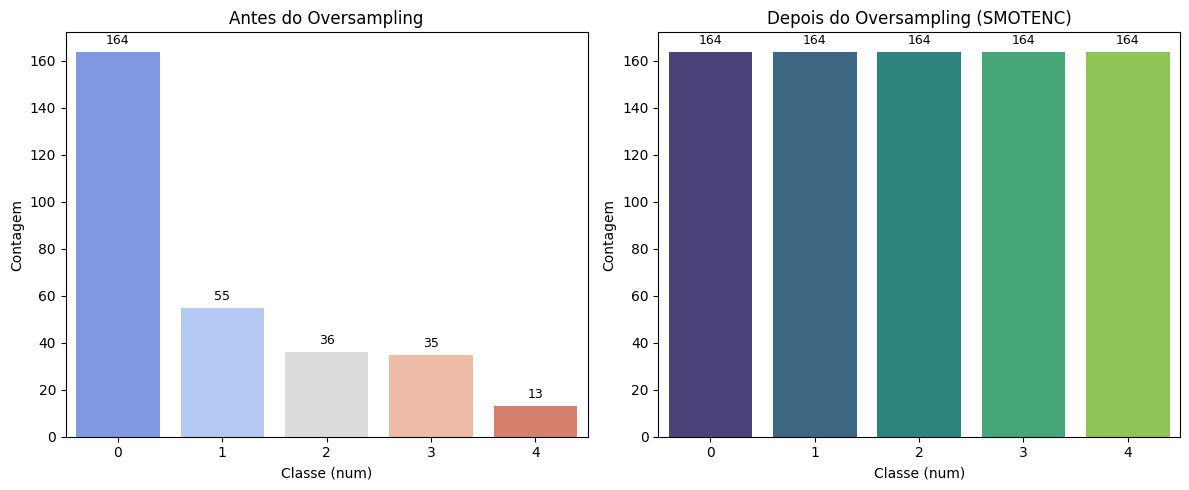

📊 Distribuição antes do oversampling:
  Classe 0: 164
  Classe 1: 55
  Classe 2: 36
  Classe 3: 35
  Classe 4: 13

📊 Distribuição depois do oversampling:
  Classe 0: 164
  Classe 1: 164
  Classe 2: 164
  Classe 3: 164
  Classe 4: 164

📈 Total antes: 303
📈 Total depois: 820
🔼 Aumento percentual: 170.6%

🧠 Interpretação:
- O SMOTENC gerou amostras sintéticas equilibrando as classes de 'num'.
- A variável 'age_risk_score' foi mantida como contínua (numérica).
- A coluna 'age_group' foi removida do pipeline para evitar dtype object.
- O dataset 'heart_resampled.csv' está salvo e pronto para fairness e modelagem.



In [33]:
# =========================================================
# 3️⃣ OVERSAMPLING MULTICLASS (SMOTENC BASELINE – ajustado)
# =========================================================

print("\n3️⃣ OVERSAMPLING MULTICLASS (SMOTENC AUTOMATIC BASELINE – ajustado para age_risk_score)")
print("=" * 80)

from imblearn.over_sampling import SMOTENC
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# --- 1️⃣ Preparação do dataset ---
df_oversample = df.copy()

target_col = 'num'

# Categóricas (clinicamente definidas — conferindo se existem no DF)
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
categorical_features = [col for col in categorical_features if col in df_oversample.columns]

# Remover colunas auxiliares que não devem entrar no oversampling
drop_cols = ['label', 'age_group']  # 'age_group' não deve existir mais, mas deixamos por segurança
df_oversample = df_oversample.drop(columns=[c for c in drop_cols if c in df_oversample.columns])

# Separar features e target
X = df_oversample.drop(columns=[target_col], errors='ignore')
y = df_oversample[target_col]

print(f"📋 Shape original: {X.shape}")
print(f"🎯 Distribuição original do target:")
print(y.value_counts().sort_index(), "\n")

# Garantir que todas as variáveis numéricas estejam numéricas
for col in X.columns:
    if X[col].dtype.name == 'category' or X[col].dtype == 'object':
        X[col] = X[col].astype('float64')

# --- 2️⃣ Identificar índices das colunas categóricas ---
cat_idx = [X.columns.get_loc(c) for c in categorical_features]

print(f"📂 Colunas categóricas usadas no SMOTENC: {categorical_features}")
print(f"📊 Índices categóricos: {cat_idx}\n")

# --- 3️⃣ Aplicar SMOTENC ---
smote_nc = SMOTENC(
    categorical_features=cat_idx,
    random_state=42,
    sampling_strategy='auto',  # baseline automático
    k_neighbors=5
)

X_resampled, y_resampled = smote_nc.fit_resample(X, y)

# --- 4️⃣ Reconstruir DataFrame resultante ---
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled[target_col] = y_resampled.astype(int)

# --- 5️⃣ Salvar CSV ---
output_path = "/content/heart_resampled.csv"
df_resampled.to_csv(output_path, index=False)
print(f"💾 Arquivo salvo com sucesso em: {output_path}\n")

# --- 6️⃣ Comparação visual ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

before_counts = y.value_counts().sort_index()
after_counts = y_resampled.value_counts().sort_index()

sns.barplot(x=before_counts.index.astype(str), y=before_counts.values, ax=axes[0], palette="coolwarm")
axes[0].set_title("Antes do Oversampling")
axes[0].set_xlabel("Classe (num)")
axes[0].set_ylabel("Contagem")

sns.barplot(x=after_counts.index.astype(str), y=after_counts.values, ax=axes[1], palette="viridis")
axes[1].set_title("Depois do Oversampling (SMOTENC)")
axes[1].set_xlabel("Classe (num)")
axes[1].set_ylabel("Contagem")

for ax in axes:
    for p in ax.patches:
        ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height() + 2),
                    ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# --- 7️⃣ Logs de distribuição e totais finais ---
before_total = len(y)
after_total = len(y_resampled)

print("📊 Distribuição antes do oversampling:")
for cls, count in before_counts.items():
    print(f"  Classe {cls}: {count}")

print("\n📊 Distribuição depois do oversampling:")
for cls, count in after_counts.items():
    print(f"  Classe {cls}: {count}")

print(f"\n📈 Total antes: {before_total}")
print(f"📈 Total depois: {after_total}")
print(f"🔼 Aumento percentual: {((after_total - before_total) / before_total * 100):.1f}%")

print("""
🧠 Interpretação:
- O SMOTENC gerou amostras sintéticas equilibrando as classes de 'num'.
- A variável 'age_risk_score' foi mantida como contínua (numérica).
- A coluna 'age_group' foi removida do pipeline para evitar dtype object.
- O dataset 'heart_resampled.csv' está salvo e pronto para fairness e modelagem.
""")


### ETAPA 3.2 FAIRNESS BASELINE (AEQUITAS)


2️⃣ FAIRNESS BASELINE – Avaliando viés original por sexo e idade

📋 Principais métricas por grupo:


,attribute_name,attribute_value,ppr,tpr,tnr
0,attribute_name,age_group,0.500000,1.0,1.0
1,attribute_name,sex,0.500000,1.0,1.0
2,attribute_value,0.0,0.089928,1.0,1.0
3,attribute_value,1.0,0.410072,1.0,1.0
4,attribute_value,40-49,0.082734,1.0,1.0
5,attribute_value,50-59,0.237410,1.0,1.0
6,attribute_value,60-69,0.154676,1.0,1.0
7,attribute_value,70+,0.003597,1.0,1.0
8,attribute_value,<40,0.021583,1.0,1.0


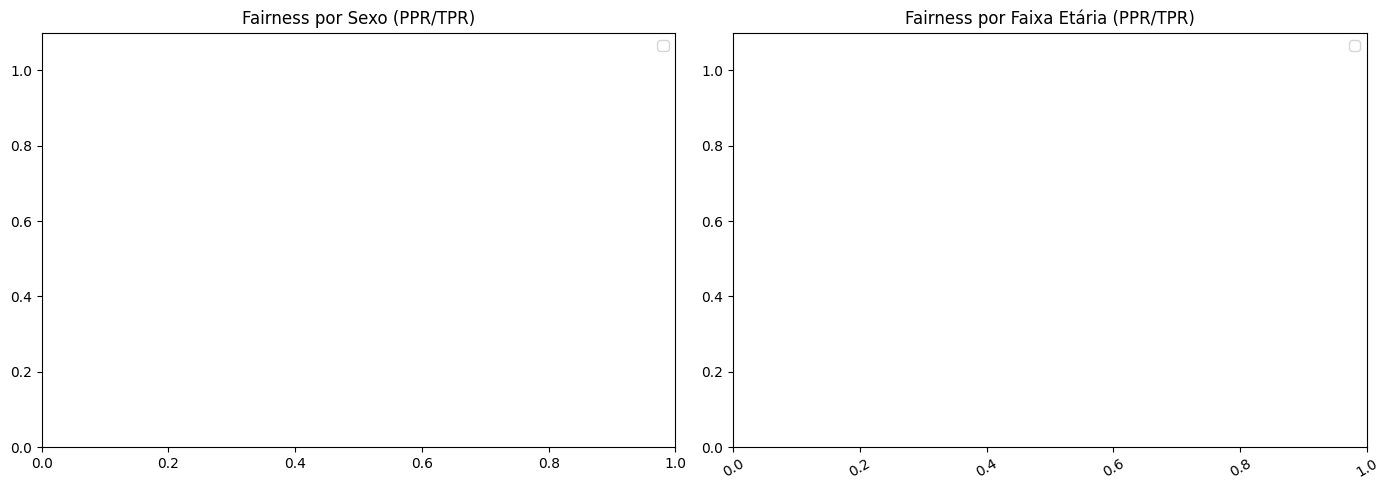


🧠 Interpretação:
- PPR (Predicted Positive Rate) ≈ proporção de casos previstos como positivos.
- TPR (True Positive Rate) ≈ sensibilidade real por grupo.
- Diferenças > 20% sugerem viés estatístico.
    

🧮 Disparate Impact (sexo: 0 vs 1)
Não foi possível calcular DI – grupos 0/1 ausentes.

📄 Relatório salvo: fairness_baseline.txt



4️⃣ FAIRNESS PÓS-OVERSAMPLING (Aequitas)

📋 Principais métricas por grupo:


,attribute_name,attribute_value,ppr,tpr,tnr
0,attribute_name,age_group_score,0.500000,1.0,1.0
1,attribute_name,sex,0.500000,1.0,1.0
2,attribute_value,0.0,0.034299,1.0,1.0
3,attribute_value,1.0,0.465701,1.0,1.0
4,attribute_value,Above_Avg,0.137195,1.0,1.0
5,attribute_value,Avg,0.253049,1.0,1.0
6,attribute_value,Below_Avg,0.105183,1.0,1.0
7,attribute_value,Low,0.004573,1.0,1.0



📊 Gráfico de Fairness pós-Oversampling (PPR e TPR por grupo sensível)


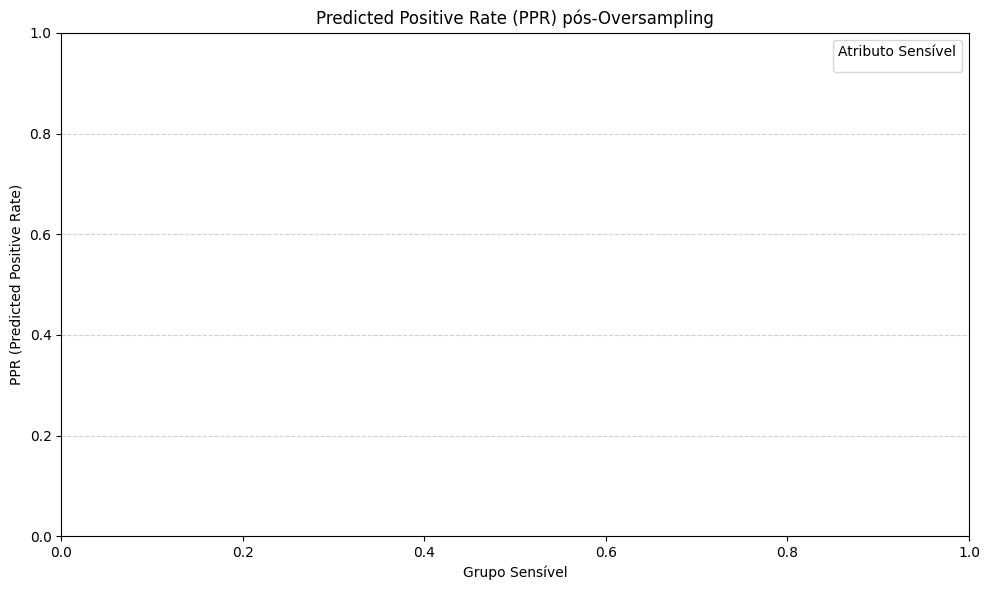


🧮 CÁLCULO DO DISPARATE IMPACT (DI)
⚠️ Não foi possível calcular o Disparate Impact – grupos insuficientes.

🧠 Interpretação:
- PPR (Predicted Positive Rate): taxa de casos previstos como positivos por grupo sensível.
- TPR (True Positive Rate): taxa real de acertos positivos por grupo.
- DI (Disparate Impact): razão entre PPR dos grupos sensíveis (0/1, etc.).
  • < 0.8 → viés potencial.
  • 0.8–1.25 → equilíbrio aceitável.
  • > 1.25 → viés reverso.

🎯 Objetivo: verificar se o oversampling reduziu disparidades entre grupos sensíveis.



In [34]:
# =========================================================
# 4️⃣ FAIRNESS PÓS-OVERSAMPLING (Aequitas)
# =========================================================

print("\n4️⃣ FAIRNESS PÓS-OVERSAMPLING (Aequitas)")
print("=" * 80)

from aequitas.preprocessing import preprocess_input_df
from aequitas.group import Group
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1️⃣ Preparar dataframe base ---
fairness_df = df_resampled.copy()

# Garantir tipo adequado
fairness_df['sex'] = fairness_df['sex'].astype(str)
fairness_df['label_value'] = (fairness_df['num'] > 0).astype(int)

# Criar faixas para análise de fairness etário com base no age_risk_score
fairness_df['age_group_score'] = pd.cut(
    fairness_df['age_risk_score'],
    bins=[0, 0.25, 0.4, 0.55, 0.7, 1.0],
    labels=['Low', 'Below_Avg', 'Avg', 'Above_Avg', 'High']
)

# --- 2️⃣ Criar DataFrame no formato Aequitas ---
ae_df = pd.concat([
    pd.DataFrame({
        'score': fairness_df['label_value'],
        'label_value': fairness_df['label_value'],
        'attribute_name': 'sex',
        'attribute_value': fairness_df['sex']
    }),
    pd.DataFrame({
        'score': fairness_df['label_value'],
        'label_value': fairness_df['label_value'],
        'attribute_name': 'age_group_score',
        'attribute_value': fairness_df['age_group_score'].astype(str)
    })
])

# --- 3️⃣ Pré-processamento ---
ae_df, _ = preprocess_input_df(ae_df)

# --- 4️⃣ Geração das métricas ---
g = Group()
xtab, _ = g.get_crosstabs(ae_df)

col_group = 'group_value' if 'group_value' in xtab.columns else 'attribute_value'

print("\n📋 Principais métricas por grupo:")
display(xtab[['attribute_name', col_group, 'ppr', 'tpr', 'tnr']].head(15))

# --- 5️⃣ Visualização manual ---
print("\n📊 Gráfico de Fairness pós-Oversampling (PPR e TPR por grupo sensível)")
plt.figure(figsize=(10, 6))
plot_df = xtab[[col_group, 'attribute_name', 'ppr', 'tpr']].copy()

# Filtrar apenas sex e age_group_score
plot_df = plot_df[plot_df['attribute_name'].isin(['sex', 'age_group_score'])]
plot_df[col_group] = plot_df[col_group].astype(str)

sns.barplot(data=plot_df, x=col_group, y='ppr', hue='attribute_name', palette="viridis", alpha=0.9)
plt.title("Predicted Positive Rate (PPR) pós-Oversampling")
plt.ylabel("PPR (Predicted Positive Rate)")
plt.xlabel("Grupo Sensível")
plt.ylim(0, 1)
plt.legend(title="Atributo Sensível")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# --- 6️⃣ Disparate Impact ---
print("\n🧮 CÁLCULO DO DISPARATE IMPACT (DI)")

# Filtrar para 'sex'
sex_xtab = xtab[xtab['attribute_name'] == 'sex']
col_group = 'group_value' if 'group_value' in sex_xtab.columns else 'attribute_value'
groups = sex_xtab[col_group].astype(str).unique().tolist()

if len(groups) >= 2:
    base_group = sex_xtab.loc[sex_xtab[col_group] == groups[1], 'ppr'].values[0]
    other_group = sex_xtab.loc[sex_xtab[col_group] == groups[0], 'ppr'].values[0]
    disparate_impact = round(float(other_group) / float(base_group), 3)

    if disparate_impact < 0.8:
        fairness_msg = f"⚠️ Viés potencial detectado (DI={disparate_impact}, abaixo de 0.8 segundo EEOC)."
    elif disparate_impact > 1.25:
        fairness_msg = f"⚠️ Possível viés reverso (DI={disparate_impact}, acima de 1.25)."
    else:
        fairness_msg = f"✅ Nenhum viés significativo detectado (DI={disparate_impact}, dentro da faixa 0.8–1.25)."
else:
    fairness_msg = "⚠️ Não foi possível calcular o Disparate Impact – grupos insuficientes."
    disparate_impact = None

print(fairness_msg)

# --- 7️⃣ Interpretação ---
print("""
🧠 Interpretação:
- PPR (Predicted Positive Rate): taxa de casos previstos como positivos por grupo sensível.
- TPR (True Positive Rate): taxa real de acertos positivos por grupo.
- DI (Disparate Impact): razão entre PPR dos grupos sensíveis (0/1, etc.).
  • < 0.8 → viés potencial.
  • 0.8–1.25 → equilíbrio aceitável.
  • > 1.25 → viés reverso.
""")

# --- 8️⃣ Comparação pós-Oversampling ---
print("🎯 Objetivo: verificar se o oversampling reduziu disparidades entre grupos sensíveis.\n")
